<a href="https://colab.research.google.com/github/jawdatmerhy/public/blob/main/LoanApproval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [500]:
# importing essential libraries
# Install Keras Tuner
#!pip install keras-tuner

from re import X
import pandas as pd

import missingno as msno
from IPython.display import display, HTML
from io import StringIO
from termcolor import colored # For colored text printing
from tabulate import tabulate
from scipy.stats import chi2_contingency
from prettytable import PrettyTable
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats.mstats import winsorize
import warnings
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.utils import class_weight
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
import plotly.express as px


import plotly.graph_objects as go
from pandas.plotting import parallel_coordinates

import warnings
warnings.filterwarnings("ignore")

def display_colored_message(message, color='black', background='orange'):
    display(HTML(f'<span style="color: {color}; background-color: {background};">{message}</span>'))

def display_colored_sub_message(message):
     print("\033[1;33;44m" + message + "\033[0m")


display_colored_message("THE REQUIRED LIBRARIES WERE SUCCESSFULLY IMPORTED...")

####################################################
try:
    # Read the CSV file and save it in "loan_data" variable
    # reading csv file
    path = '/content/sample_data/'
    df = pd.read_csv(path + 'loan.csv')

    # Print a success message
    display_colored_message("THE DATASET LOADED SUCCESSFULLY...")

except FileNotFoundError:
    # Handle file not found error
    print(colored("ERROR: File not found!", "red", attrs=['reverse']))

except Exception as e:
    # Handle other exceptions
    print(colored(f"ERROR: {e}", "red", attrs=['reverse']))

In [501]:
####################################################
display_colored_message("PRINTING THE FIRST FIVE ROWS OF THE DATASET...")
# printing first five rows of dataset

print(colored(tabulate(df.head(5), headers='keys', tablefmt='fancy_grid'), 'cyan'))

####################################################
display_colored_message("PRINTING THE LAST FIVE ROWS OF THE DATASET...")
# Printing last five rows of datset
print(colored(tabulate(df.tail(5), headers='keys', tablefmt='fancy_grid'), 'cyan'))


╒════╤═══════════╤══════════╤═══════════╤══════════════╤══════════════╤═════════════════╤═══════════════════╤═════════════════════╤══════════════╤════════════════════╤══════════════════╤═════════════════╤═══════════════╕
│    │ Loan_ID   │ Gender   │ Married   │   Dependents │ Education    │ Self_Employed   │   ApplicantIncome │   CoapplicantIncome │   LoanAmount │   Loan_Amount_Term │   Credit_History │ Property_Area   │ Loan_Status   │
╞════╪═══════════╪══════════╪═══════════╪══════════════╪══════════════╪═════════════════╪═══════════════════╪═════════════════════╪══════════════╪════════════════════╪══════════════════╪═════════════════╪═══════════════╡
│  0 │ LP001002  │ Male     │ No        │            0 │ Graduate     │ No              │              5849 │                   0 │          nan │                360 │                1 │ Urban           │ Y             │
├────┼───────────┼──────────┼───────────┼──────────────┼──────────────┼─────────────────┼───────────────────┼───────

╒═════╤═══════════╤══════════╤═══════════╤══════════════╤═════════════╤═════════════════╤═══════════════════╤═════════════════════╤══════════════╤════════════════════╤══════════════════╤═════════════════╤═══════════════╕
│     │ Loan_ID   │ Gender   │ Married   │ Dependents   │ Education   │ Self_Employed   │   ApplicantIncome │   CoapplicantIncome │   LoanAmount │   Loan_Amount_Term │   Credit_History │ Property_Area   │ Loan_Status   │
╞═════╪═══════════╪══════════╪═══════════╪══════════════╪═════════════╪═════════════════╪═══════════════════╪═════════════════════╪══════════════╪════════════════════╪══════════════════╪═════════════════╪═══════════════╡
│ 609 │ LP002978  │ Female   │ No        │ 0            │ Graduate    │ No              │              2900 │                   0 │           71 │                360 │                1 │ Rural           │ Y             │
├─────┼───────────┼──────────┼───────────┼──────────────┼─────────────┼─────────────────┼───────────────────┼───────

In [502]:
####################################################
display_colored_message("OBTAINING THE DIMENSIONS OF THE DATASET...")
# Obtaining the dimensions of dataset
print("The shape =", df.shape)

# Dataset dimensions and statistics
num_rows, num_cols = df.shape
num_features = num_cols - 1
num_data = num_rows * num_cols

# Print the information about the dataset
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_cols}")
print(f"Number of Features: {num_features}")
print(f"Number of All Data: {num_data}")



The shape = (614, 13)
Number of Rows: 614
Number of Columns: 13
Number of Features: 12
Number of All Data: 7982


In [503]:
####################################################
display_colored_message("DISPLAY THE LIST COLUMNS...")
print(df.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [504]:
####################################################
display_colored_message("RENAME COLUMNS...")
#Rename columuns Self_Employed, Credit_History, Loan_Amount_Term
df = df.rename(columns={'Self_Employed' : 'SelfEmployed'})
df = df.rename(columns={'Credit_History' : 'CreditHistory'})
df = df.rename(columns={'Loan_Amount_Term' : 'LoanAmountTerm'})
df = df.rename(columns={'Property_Area' : 'PropertyArea'})
print(df.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'SelfEmployed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'LoanAmountTerm', 'CreditHistory', 'PropertyArea', 'Loan_Status'],
      dtype='object')


In [505]:

####################################################
display_colored_message("STATISTICAL SUMMARY OF THE DATASET...")
# Statistical summary of dataset
#df.info()

# Function to extract info into a DataFrame
def extract_info(df):
    buffer = StringIO()
    df.info(buf=buffer)
    s = buffer.getvalue()

    # Parse the buffer content to extract column info
    lines = s.split('\n')
    col_lines = lines[5:-3]  # Data lines

    memory_line = lines[-2]  # Memory usage line

    info_dict = {
        "Column": [],
        "Non-Null Count": [],
        "Dtype": []
    }

    for line in col_lines:
        parts = line.split()
        info_dict["Column"].append(parts[1])
        info_dict["Non-Null Count"].append(int(parts[2].replace(',', '')))
        info_dict["Dtype"].append(parts[-1])

    info_df = pd.DataFrame(info_dict)
    return info_df

# Extract info and create a DataFrame
info_df = extract_info(df)

# Convert Non-Null Count to a proportion for better gradient visualization
info_df['Non-Null Proportion'] = info_df['Non-Null Count'] / len(df)

# Style the DataFrame
styled_info_df = info_df.style.background_gradient(cmap='viridis', subset=['Non-Null Proportion'])

# Display the styled DataFrame
display(styled_info_df)

,Column,Non-Null Count,Dtype,Non-Null Proportion
0,Loan_ID,614,object,1.000000
1,Gender,601,object,0.978827
2,Married,611,object,0.995114
3,Dependents,599,object,0.975570
4,Education,614,object,1.000000
5,SelfEmployed,582,object,0.947883
6,ApplicantIncome,614,int64,1.000000
7,CoapplicantIncome,614,float64,1.000000
8,LoanAmount,592,float64,0.964169
9,LoanAmountTerm,600,float64,0.977199


In [506]:
####################################################
display_colored_message("SUMMARY STATISTICTS FOR NUMERICAL COLUMNS...")
#Calculate summary statistics for numerical columns using describe()
#print(df.describe())

# Describe and style
styled_df = df.describe().T.style.background_gradient(cmap='viridis')

# Use display to explicitly show the styled DataFrame
display(styled_df)

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.000000,5403.459283,6109.041673,150.000000,2877.500000,3812.500000,5795.000000,81000.000000
CoapplicantIncome,614.000000,1621.245798,2926.248369,0.000000,0.000000,1188.500000,2297.250000,41667.000000
LoanAmount,592.000000,146.412162,85.587325,9.000000,100.000000,128.000000,168.000000,700.000000
LoanAmountTerm,600.000000,342.000000,65.120410,12.000000,360.000000,360.000000,360.000000,480.000000
CreditHistory,564.000000,0.842199,0.364878,0.000000,1.000000,1.000000,1.000000,1.000000


149


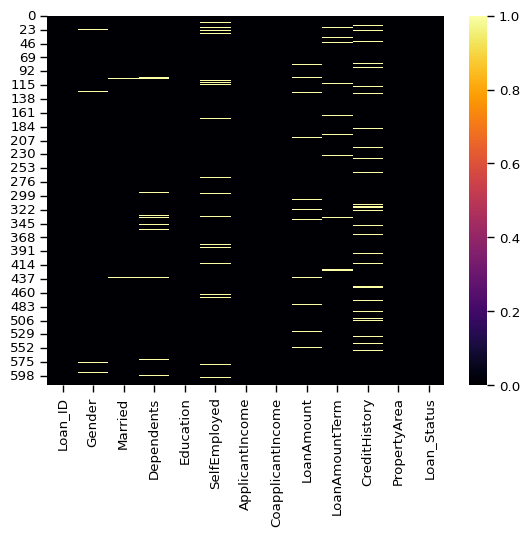

In [507]:
####################################################
display_colored_message("TOTAL OF NULL VALUES...")
# Calculate the total of null values
print(df.isnull().sum().sum())

display_colored_message("VISULIZE THE NULL VALUES USING HEATMAP...")
# Visulize the null values using heatmp
df.isnull().sum()
sns.heatmap(df.isnull(), cbar=True, cmap='inferno')
plt.show()

In [508]:
####################################################
display_colored_message("FIND THE DUPLICATED ROWS...")
#Find the duplicated rows
print('Duplicated row sum : ', df.duplicated().sum())

display_colored_sub_message("\n>>>>>>>>>>>>>> To remove duplicated lines if they exist")
print("Calculate the percentage of duplicated rows")
# Calculate the percentage of duplicated rows
percent_duplication = df.duplicated().sum() / df.shape[0]
print(f"Percentage of duplicated rows: {percent_duplication * 100:.2f}%")

display_colored_sub_message("\n>>>>>>>>>>>>>> Check if there are any duplicated rows and if the percentage is less than 5%")
# Check if there are any duplicated rows and if the percentage is less than 5%
if 0 < percent_duplication < 0.05:
    display_colored_sub_message("\n>>>>>>>>>>>>>> Drop duplicated rows")
    # Drop duplicated rows
    df = df.drop_duplicates()
else:
    print("There are no duplicated rows or the percentage is 5% or higher")

# Optional: print the percentage of duplication
print(f"Percentage of duplicated rows: {percent_duplication * 100:.2f}%")


fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    gauge = {
       'axis': {'range': [None, 100]}},
    value = percent_duplication,
    title = {'text': "Duplication %"},
    domain = {'x': [0, 1], 'y': [0, 1]}
))
fig.show()

Duplicated row sum :  0

>>>>>>>>>>>>>> To remove duplicated lines if they exist
Calculate the percentage of duplicated rows
Percentage of duplicated rows: 0.00%

>>>>>>>>>>>>>> Check if there are any duplicated rows and if the percentage is less than 5%
There are no duplicated rows or the percentage is 5% or higher
Percentage of duplicated rows: 0.00%


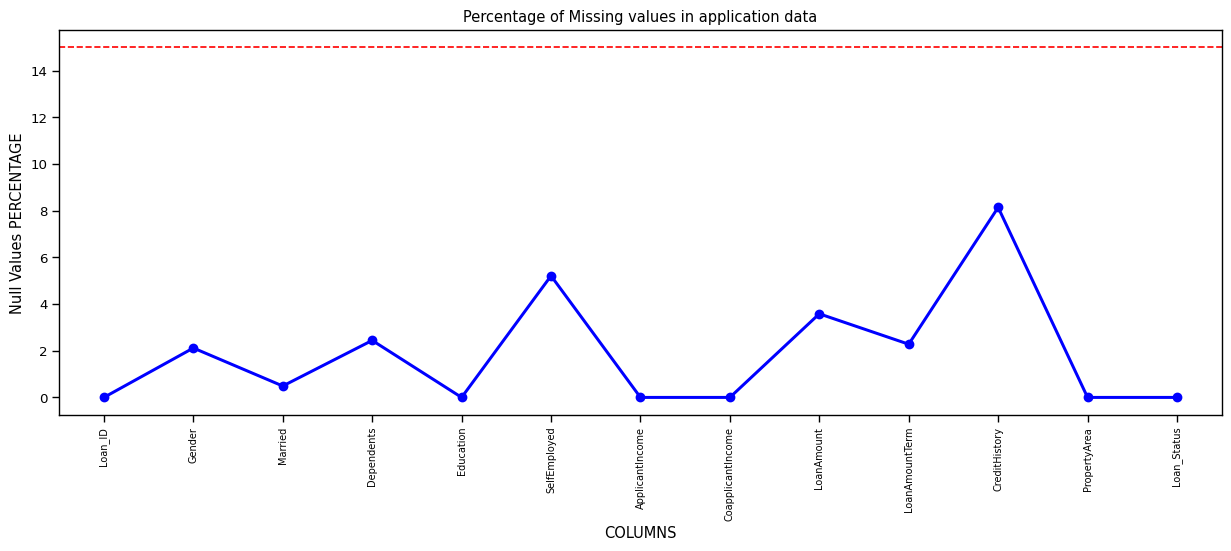

Total missing values After fillna :  0


In [509]:
####################################################
display_colored_message("FILL MISSING VALUES...")


null_applicationDF = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
null_applicationDF.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(15,5))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_applicationDF,color='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(15, ls='--',color='red')
plt.title("Percentage of Missing values in application data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

#Missing Value
# Gender column
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
# Married column
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
# Dependents Column
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
# Self_Employed Column
df['SelfEmployed'].fillna('No',inplace=True)
# Credit_History Column
df['CreditHistory'] = df['CreditHistory'].fillna(df['CreditHistory'].mode()[0])
# LoanAmount Column
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
# Loan_Amount Column
df['LoanAmountTerm'] = df['LoanAmountTerm'].fillna(df['LoanAmountTerm'].mode()[0])
# PropertyArea Column
df['PropertyArea'] = df['PropertyArea'].fillna(df['PropertyArea'].mode()[0])

print('Total missing values After fillna : ', df.isnull().sum().sum())

In [510]:
####################################################
display_colored_message("DEALING WITH CATEGORICAL VALUES...")
# Dealing with Categorical values

# Gender Column
#df['Gender'] =  df['Gender'].map({'Male':0,'Female':1})
le = LabelEncoder()
#df["Gender"] = le.fit_transform(df["Gender"])
#df["Married"] = le.fit_transform(df["Married"])
df["Loan_Status"] = le.fit_transform(df["Loan_Status"])

print(colored(tabulate(df.head(2), headers='keys', tablefmt='fancy_grid'), 'cyan'))

╒════╤═══════════╤══════════╤═══════════╤══════════════╤═════════════╤════════════════╤═══════════════════╤═════════════════════╤══════════════╤══════════════════╤═════════════════╤════════════════╤═══════════════╕
│    │ Loan_ID   │ Gender   │ Married   │   Dependents │ Education   │ SelfEmployed   │   ApplicantIncome │   CoapplicantIncome │   LoanAmount │   LoanAmountTerm │   CreditHistory │ PropertyArea   │   Loan_Status │
╞════╪═══════════╪══════════╪═══════════╪══════════════╪═════════════╪════════════════╪═══════════════════╪═════════════════════╪══════════════╪══════════════════╪═════════════════╪════════════════╪═══════════════╡
│  0 │ LP001002  │ Male     │ No        │            0 │ Graduate    │ No             │              5849 │                   0 │          128 │              360 │               1 │ Urban          │             1 │
├────┼───────────┼──────────┼───────────┼──────────────┼─────────────┼────────────────┼───────────────────┼─────────────────────┼───────────

In [511]:
##############################################
display_colored_message("\nchi2 CHECK...")

# Filter columns with 'object' dtype
categorical_columns = df.select_dtypes(include=['object']).columns
display_colored_sub_message("\nNull Hypothesis: there is no relation between categorical variables and Loan_Status")

chi2_check = []
for i in categorical_columns:
    if chi2_contingency(pd.crosstab(df['Loan_Status'], df[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')


res = pd.DataFrame({'Column': categorical_columns, 'Hypothesis': chi2_check})

# Define a function to color the cells
def color_hypothesis(val):
    color = 'green' if val == 'Reject Null Hypothesis' else 'red'
    return f'color: {color}'

# Apply the coloring function to the Hypothesis column
styled_res = res.style.applymap(color_hypothesis, subset=['Hypothesis'])

# Display the styled DataFrame
styled_res


Null Hypothesis: there is no relation between categorical variables and Loan_Status


,Column,Hypothesis
0,Loan_ID,Fail to Reject Null Hypothesis
1,Gender,Fail to Reject Null Hypothesis
2,Married,Reject Null Hypothesis
3,Dependents,Fail to Reject Null Hypothesis
4,Education,Reject Null Hypothesis
5,SelfEmployed,Fail to Reject Null Hypothesis
6,PropertyArea,Reject Null Hypothesis


In [512]:
####################################################
display_colored_message("DROP COLUMNS...")
# Drop columns
columns_to_drop = ['Loan_ID']
df.drop(columns_to_drop, axis=1, inplace=True)

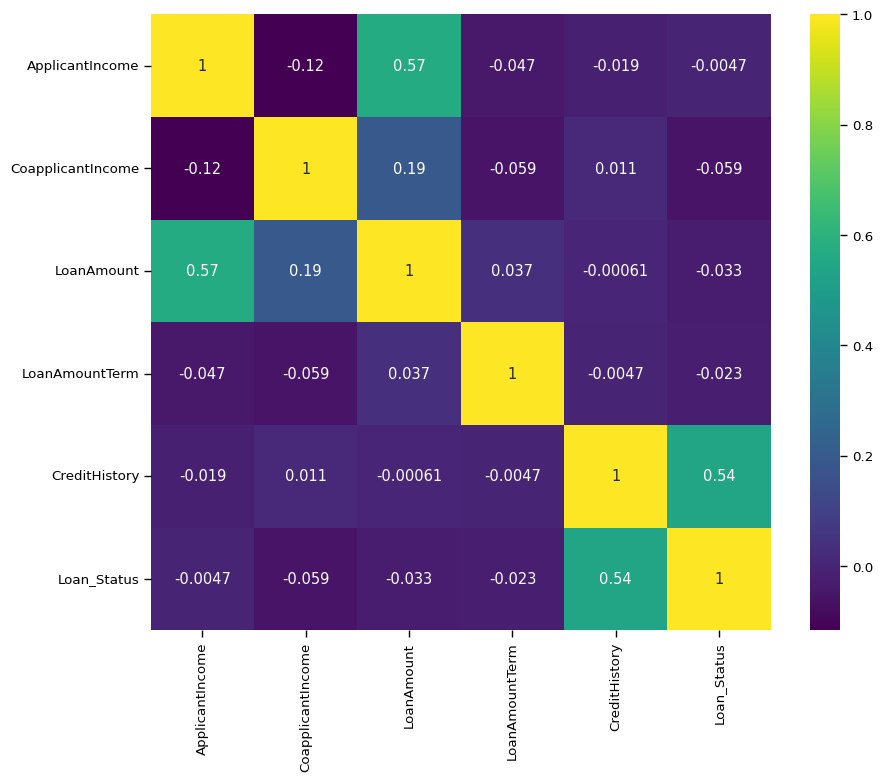

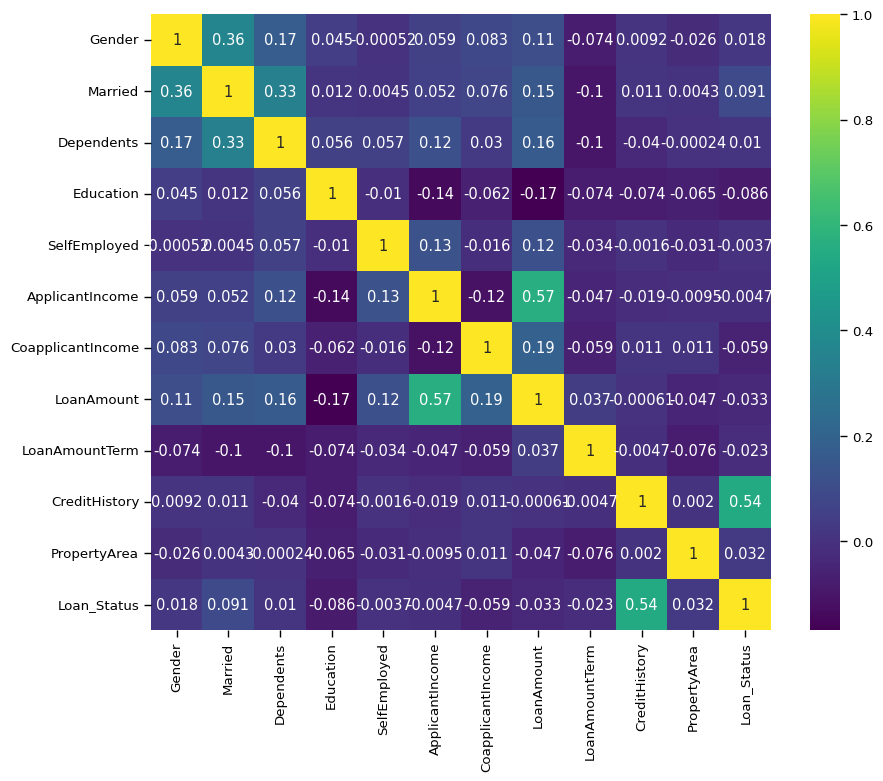

In [513]:
####################################################
display_colored_message("DISPLAY CORRELATION...")
dfCopy = df.copy()
# Filter columns with 'object' dtype
object_columns = dfCopy.select_dtypes(include=['object']).columns

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="viridis")
plt.show()

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to 'object' columns
for col in object_columns:
    dfCopy[col] = le.fit_transform(dfCopy[col])

plt.figure(figsize=(10,8))
sns.heatmap(dfCopy.corr(),annot=True,cmap="viridis")
plt.show()


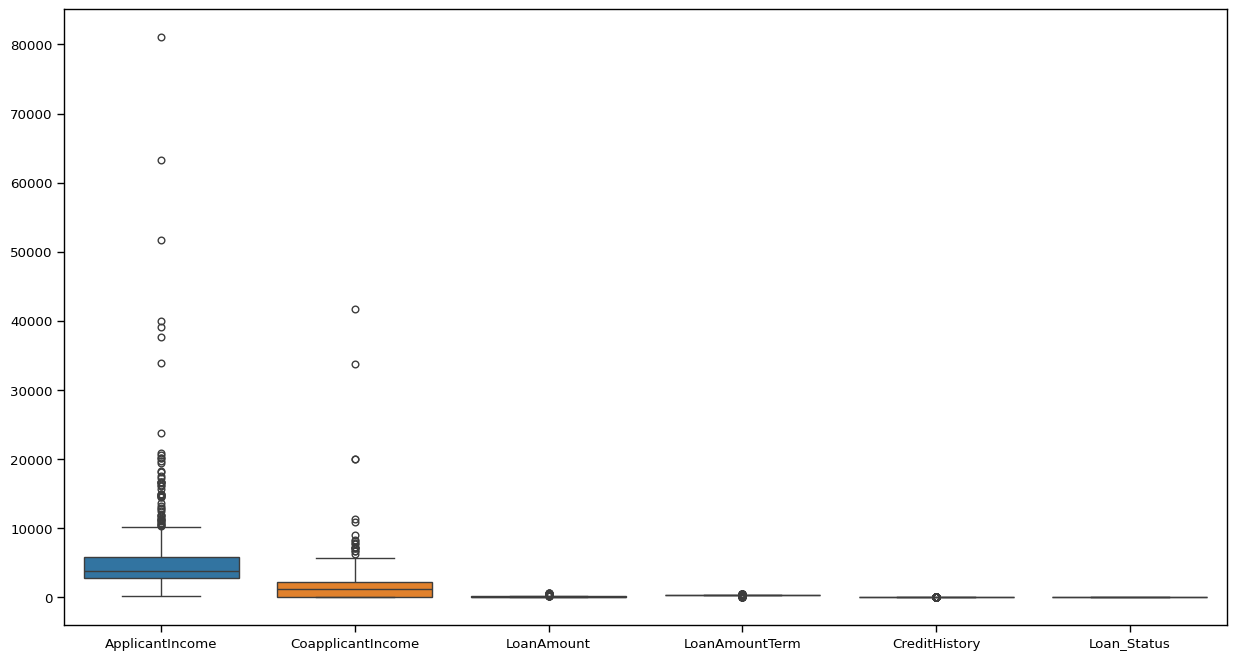

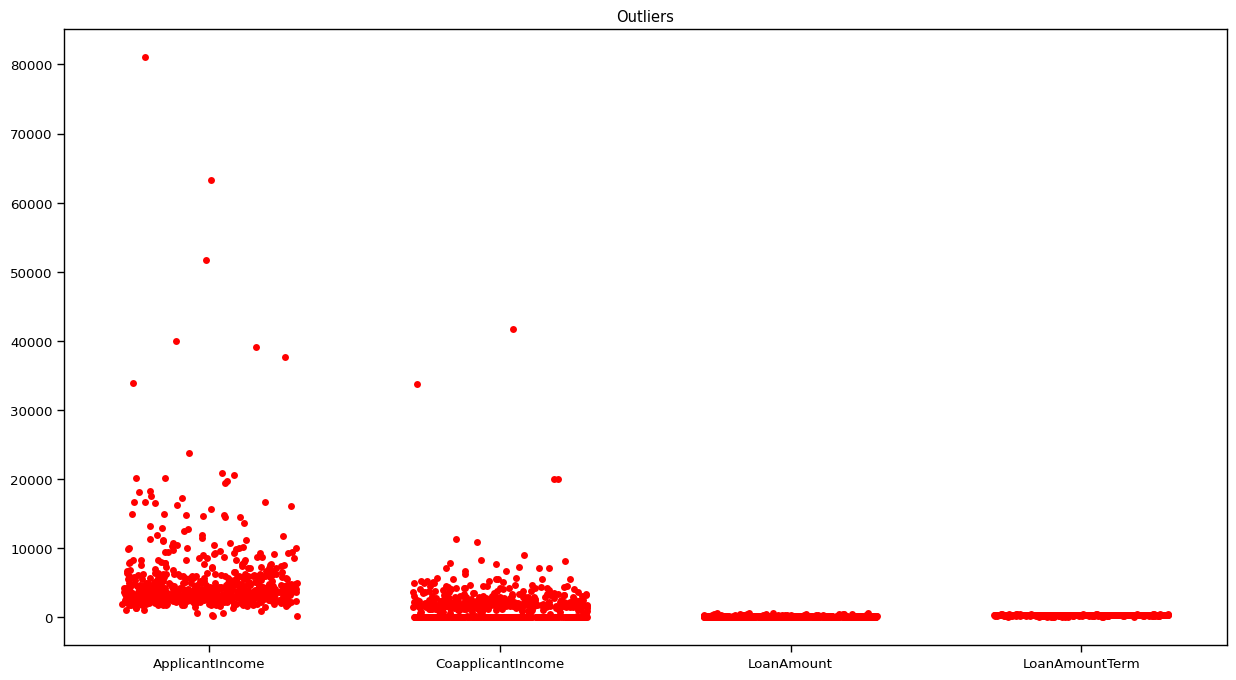

In [514]:

###################################################
display_colored_message("BOX PLOT DATASET...")
plt.figure(figsize=(15,8))
sns.boxplot(data=df)
plt.show()

display_colored_message("DISPLAY OUTLIERS...")
# Set the figure size
plt.figure(figsize=(15, 8))

# Only variables that have outliers
outliersColumns = df.get(["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "LoanAmountTerm"])

# Add outliers to the plot
sns.stripplot(data=outliersColumns, color="red", jitter=0.3, size=5)

# Set the axis labels and title
plt.title("Outliers")

# Show the plot
plt.show()



Outliers lowerBound: 
 ApplicantIncome     -1498.750
CoapplicantIncome   -3445.875
LoanAmount              3.500
dtype: float64
Outliers upperBound: 
 ApplicantIncome      10171.250
CoapplicantIncome     5743.125
LoanAmount             261.500
dtype: float64


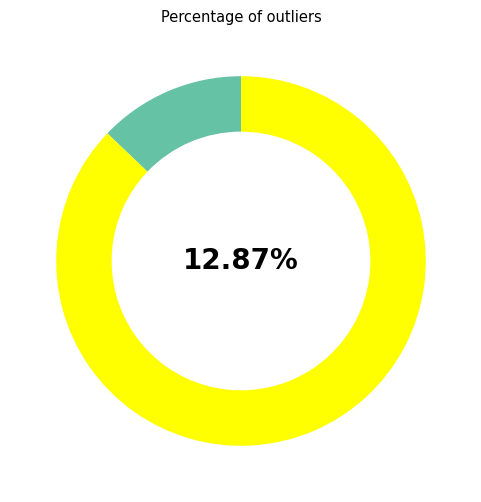

Outliers percentage too high > 5%


In [515]:
####################################################
display_colored_message("HANDLE OUTLIERS...")

def calculate_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    potential_outliers = df[columns][(df[columns] < lower_bound) | (df[columns] > upper_bound)]
    return lower_bound, upper_bound, potential_outliers

def plot_pie_chart(percent_outliers):
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
    sizes = [percent_outliers * 100, 100 - (percent_outliers * 100)]
    colors = ['#66c2a5', 'Yellow']
    wedges, _ = ax.pie(sizes, colors=colors, startangle=90, wedgeprops=dict(width=0.3))
    plt.text(0, 0, f'{percent_outliers * 100:.2f}%', ha='center', va='center', fontsize=20, weight='bold')
    plt.title('Percentage of outliers')
    plt.show()

columns_to_check = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
lower_bound, upper_bound, potential_outliers = calculate_outliers(df, columns_to_check)

print("Outliers lowerBound: \n", lower_bound)
print("Outliers upperBound: \n", upper_bound)

potential_outliers_row_count = potential_outliers.notnull().sum()
display_colored_message(f"\nSum of each outliers: {potential_outliers_row_count}", "blue")

unique_outlier_rows = potential_outliers.any(axis=1)
df_unique_outliers = df[unique_outlier_rows]
total_unique_outliers = df_unique_outliers.shape[0]
display_colored_message(f"\nTotal number of unique rows with outliers: {total_unique_outliers}", "blue")

percent_outliers = total_unique_outliers / df.shape[0]
display_colored_message(f"Percentage of outliers before treatment : {percent_outliers * 100:.2f}%", "blue")

plot_pie_chart(percent_outliers)

if 0 < percent_outliers < 0.05:
    display_colored_message("\nRemoving outliers", "blue")
else:
    print("Outliers percentage too high > 5%")


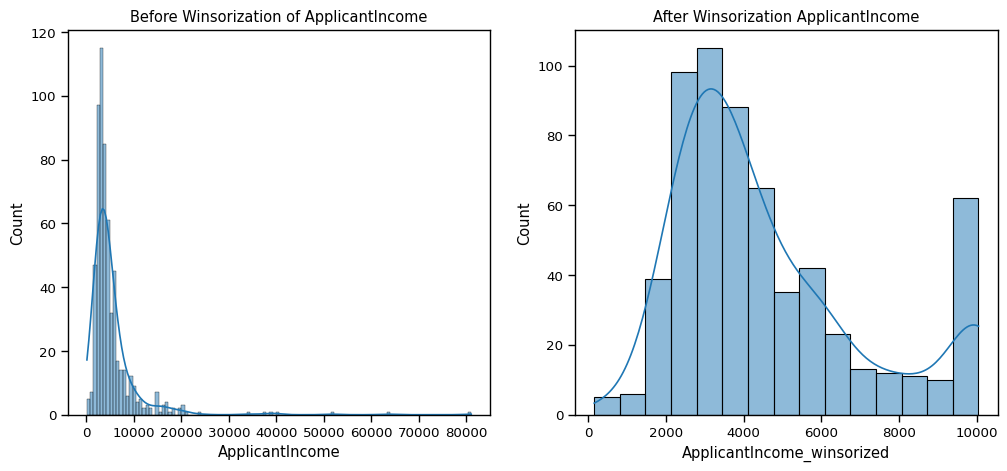

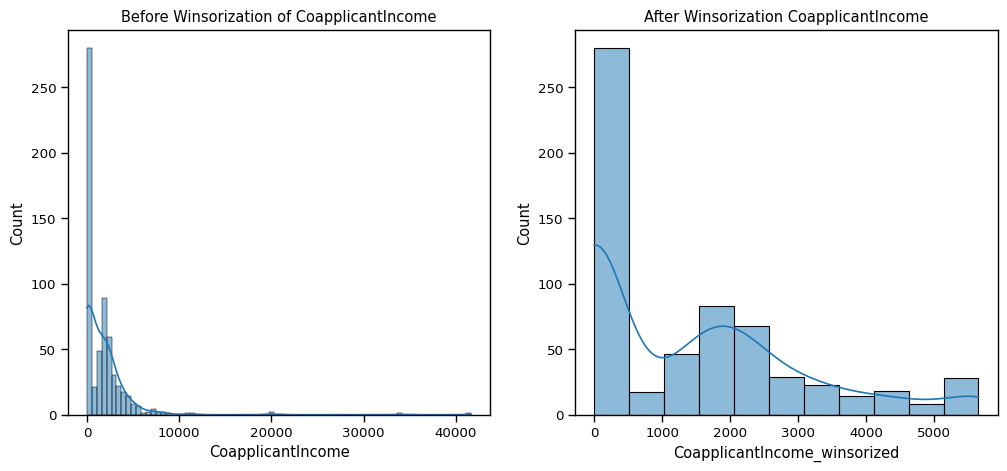

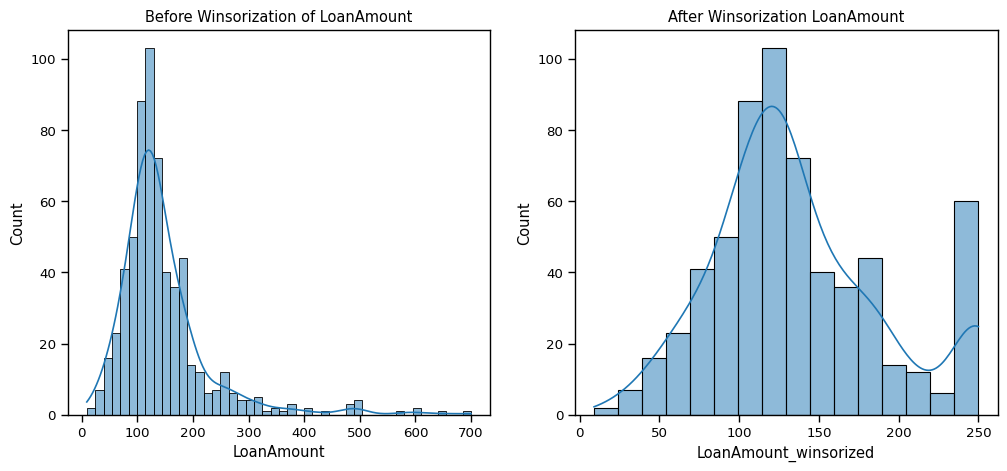

Outliers --lowerBound:
 ApplicantIncome     -1498.750
CoapplicantIncome   -3445.875
LoanAmount              3.500
dtype: float64
Outliers --upperBound:
 ApplicantIncome      10171.250
CoapplicantIncome     5743.125
LoanAmount             261.500
dtype: float64

Sum of each outliers:
 ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
dtype: int64

Total number of unique rows with outliers:
 0
Percentage of outliers: 0.00%


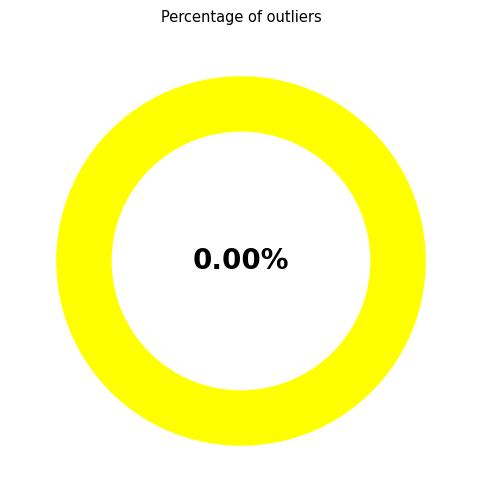

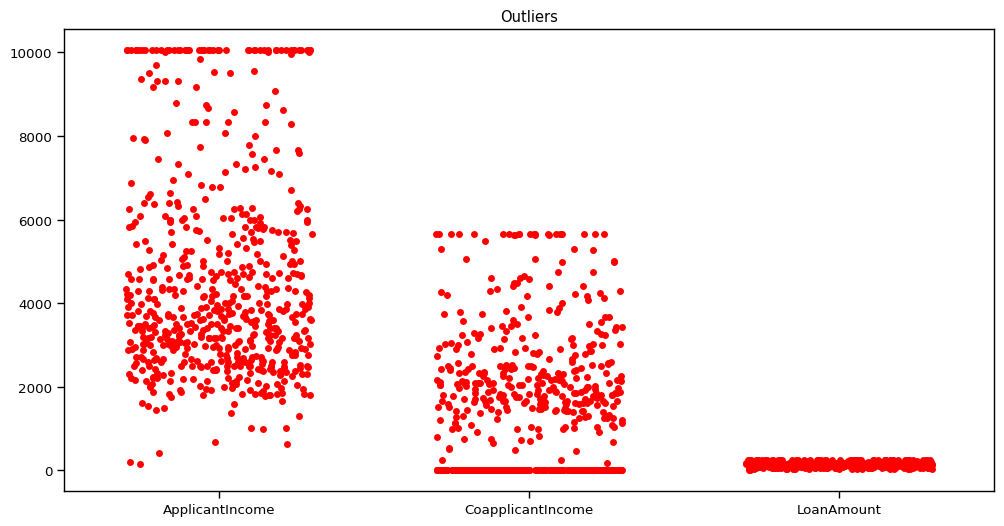

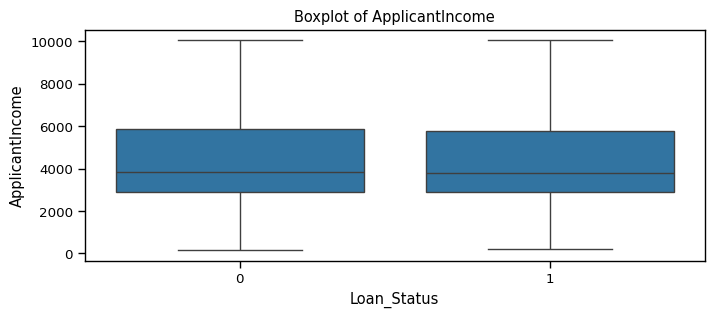

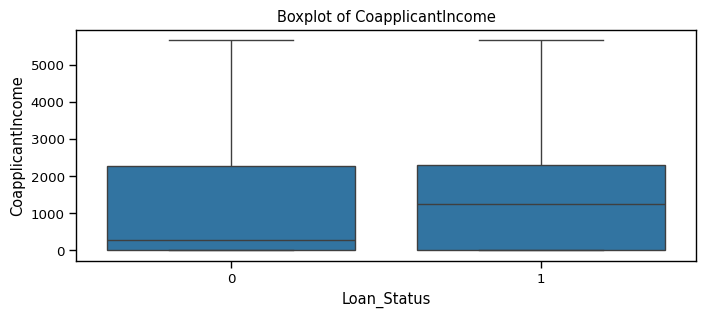

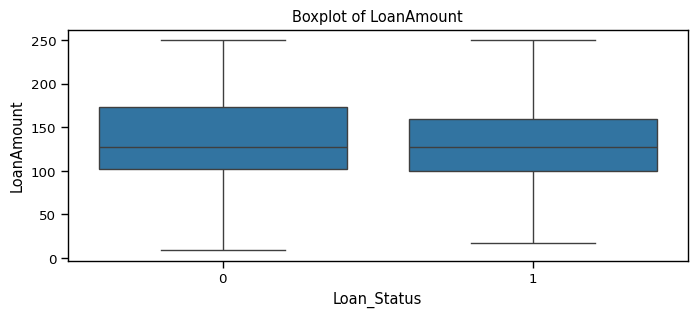

In [516]:
####################################################
display_colored_message("REMOVE OUTLIERS...")

def winsorize_column(df, column, lower_limit, upper_limit):
    count = df[df[column] < upper_limit].shape[0]
    percentile = (df.shape[0] - count) / df.shape[0]
    display_colored_message(f'{column} [count < {upper_limit}] : {count}', "blue")
    display_colored_message(f'{column} [perc < {upper_limit}] : {percentile}', "blue")
    winsorized_column = f'{column}_winsorized'
    df[winsorized_column] = winsorize(df[column], limits=(lower_limit, upper_limit))
    plot_histograms(df, column, winsorized_column)
    df[column] = df[winsorized_column]

def plot_histograms(df, column, winsorized_column):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Before Winsorization of {column}')
    plt.subplot(1, 2, 2)
    sns.histplot(df[winsorized_column], kde=True)
    plt.title(f'After Winsorization {column}')
    plt.show()

def plot_stripplot(df, columns):
    plt.figure(figsize=(12, 6))
    sns.stripplot(data=df[columns], color="red", jitter=0.3, size=5)
    plt.title("Outliers")
    plt.show()

def plot_boxplots(df, columns):
    for column in columns:
        plt.figure(figsize=(8, 3))
        sns.boxplot(x='Loan_Status', y=column, data=df)
        plt.title(f'Boxplot of {column}')
        plt.show()


df_winsorized = df.copy()

# Winsorize the column 'ApplicantIncome', ApplicantIncome is the column with potential outliers,  ~ 50/614 = 0.0815
winsorize_column(df_winsorized, 'ApplicantIncome', 0.0001, 0.084)

# Winsorize the column 'CoapplicantIncome', CoapplicantIncome is the column with potential outliers ~ 18/614 = 0.0295
winsorize_column(df_winsorized, 'CoapplicantIncome', 0.0001, 0.031)

# Winsorize the column 'LoanAmount', LoanAmount is the column with potential outliers ~ 41/614 = 0.067
winsorize_column(df_winsorized, 'LoanAmount', 0.0001, 0.085)

df[columns_to_check] = df_winsorized[columns_to_check]

lower_bound, upper_bound, potential_outliers = calculate_outliers(df, columns_to_check)

print("Outliers --lowerBound:\n", lower_bound)
print("Outliers --upperBound:\n", upper_bound)
potential_outliers_row_count = potential_outliers.notnull().sum()
print("\nSum of each outliers:\n", potential_outliers_row_count)

unique_outlier_rows = potential_outliers.any(axis=1)
df_unique_outliers = df[unique_outlier_rows]
total_unique_outliers = df_unique_outliers.shape[0]
print("\nTotal number of unique rows with outliers:\n", total_unique_outliers)

percent_outliers = total_unique_outliers / df.shape[0]
print(f"Percentage of outliers: {percent_outliers * 100:.2f}%")
plot_pie_chart(percent_outliers)

plot_stripplot(df, columns_to_check)

plot_boxplots(df, columns_to_check)

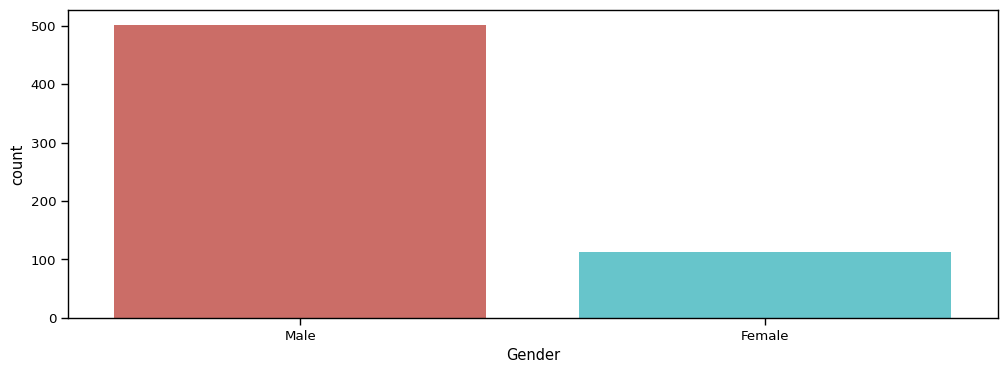

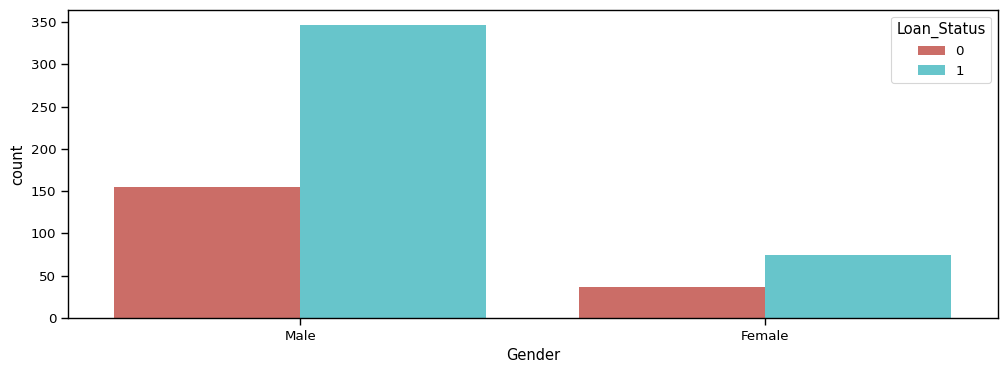

<Figure size 1500x600 with 0 Axes>

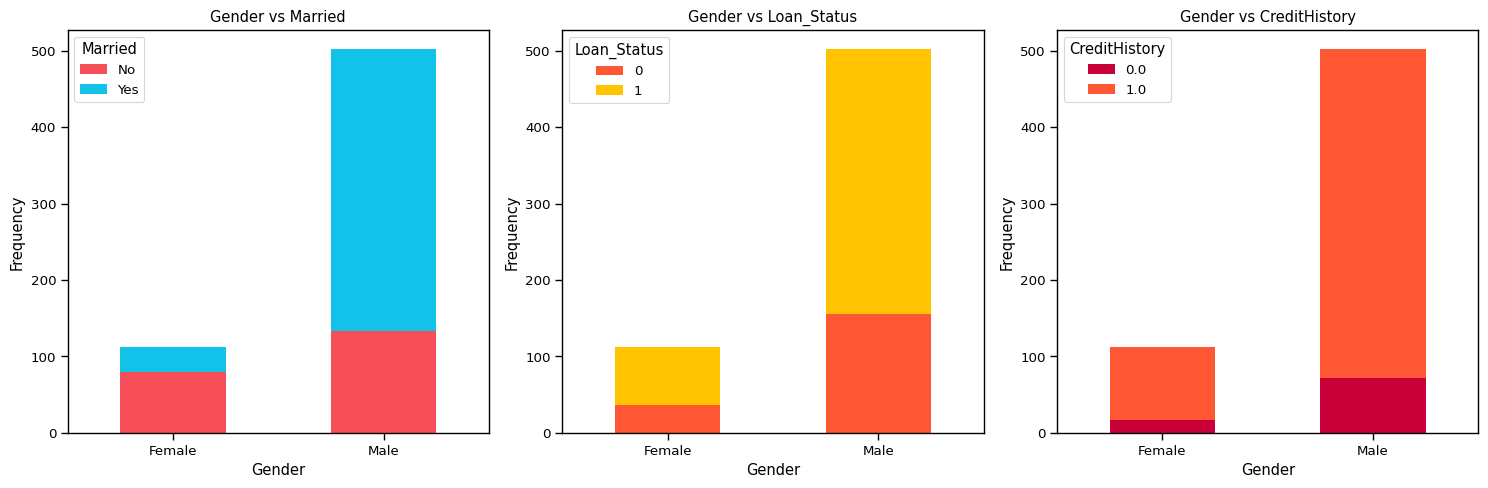

In [517]:
####################################################
display_colored_message("DATA VISULAZATION...")

# Counting the accurance of each value in Gender column
df['Gender'].value_counts()

plt.figure(figsize=(12, 4))
sns.countplot(x='Gender', data=df, palette='hls')
plt.show()

# comparing loan status with gender column
plt.figure(figsize=(12,4))
sns.countplot(x = 'Gender',hue ='Loan_Status', data=df , palette='hls')
plt.show()

#Married people collect more loan than unmarried
#Counting the occurence of each value with Loan_amount_term column
df['LoanAmountTerm'].value_counts()
plt.figure(figsize=(15,6))
#sns.countplot('Loan_Amount_Term', data = df, palette='hls')
#plt.xticks(rotation = 90)
#plt.show()

# Creating cross-tabulations
crosstab1 = pd.crosstab(df.Gender, df.Married)
crosstab2 = pd.crosstab(df.Gender, df.Loan_Status)
crosstab3 = pd.crosstab(df.Gender, df.CreditHistory)

# Plotting the cross-tabulations in subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Gender vs Married
crosstab1.plot(kind="bar", stacked=True, ax=axes[0], color=['#f64f59', '#12c2e9'])
axes[0].set_title('Gender vs Married')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Frequency')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Gender vs Loan_Status
crosstab2.plot(kind="bar", stacked=True, ax=axes[1], color=['#FF5733', '#FFC300'])
axes[1].set_title('Gender vs Loan_Status')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Frequency')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

# Gender vs LoanAmount
# For CreditHistory, we will use a different kind of plot since it's continuous data.
crosstab3.plot(kind="bar", stacked=True, ax=axes[2], color=['#C70039', '#FF5733'])
axes[2].set_title('Gender vs CreditHistory')
axes[2].set_xlabel('Gender')
axes[2].set_ylabel('Frequency')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()



In [518]:

####################################################
display_colored_message("3D SCATTER PLOT OF LOAN DATA...")

plt.figure(figsize=(15, 10))
fig = px.scatter_3d(df,
                    x='ApplicantIncome',
                    y='CoapplicantIncome',
                    z='LoanAmount',
                    color='Loan_Status',
                    size='CreditHistory',
                    size_max=18,
                    symbol='Gender',
                    opacity=0.7,
                    title='3D Scatter Plot of Loan Data',
                    labels={
                        'ApplicantIncome': 'Applicant Income',
                        'CoapplicantIncome': 'Coapplicant Income',
                        'LoanAmount': 'Loan Amount',
                        'Loan_Status': 'Loan Status',
                        'CreditHistory': 'Credit History',
                        'Gender': 'Gender'
                    })

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  scene=dict(
                      xaxis_title='Applicant Income',
                      yaxis_title='Coapplicant Income',
                      zaxis_title='Loan Amount',
                  ))

fig.show()


display_colored_message("#D SCATTER PLOT OF LOAN DATA BY LOAN STATUS AND GENDER...")

plt.figure(figsize=(15, 10))
fig = px.scatter_3d(df,
                    x='LoanAmount',
                    y='ApplicantIncome',
                    z='LoanAmountTerm',
                    color='Loan_Status',
                    size='CreditHistory',
                    size_max=18,
                    symbol='Gender',
                    opacity=0.7,
                    title='3D Scatter Plot of Loan Data by Loan Status and Gender',
                    labels={
                        'LoanAmount': 'Loan Amount',
                        'ApplicantIncome': 'Applicant Income',
                        'LoanAmountTerm': 'Loan Term',
                        'LoanStatus': 'Loan Status',
                        'CreditHistory': 'Credit History',
                        'Gender': 'Gender'
                    })

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  scene=dict(
                      xaxis_title='Loan Amount',
                      yaxis_title='Applicant Income',
                      zaxis_title='Loan Term',
                  ))

fig.show()

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

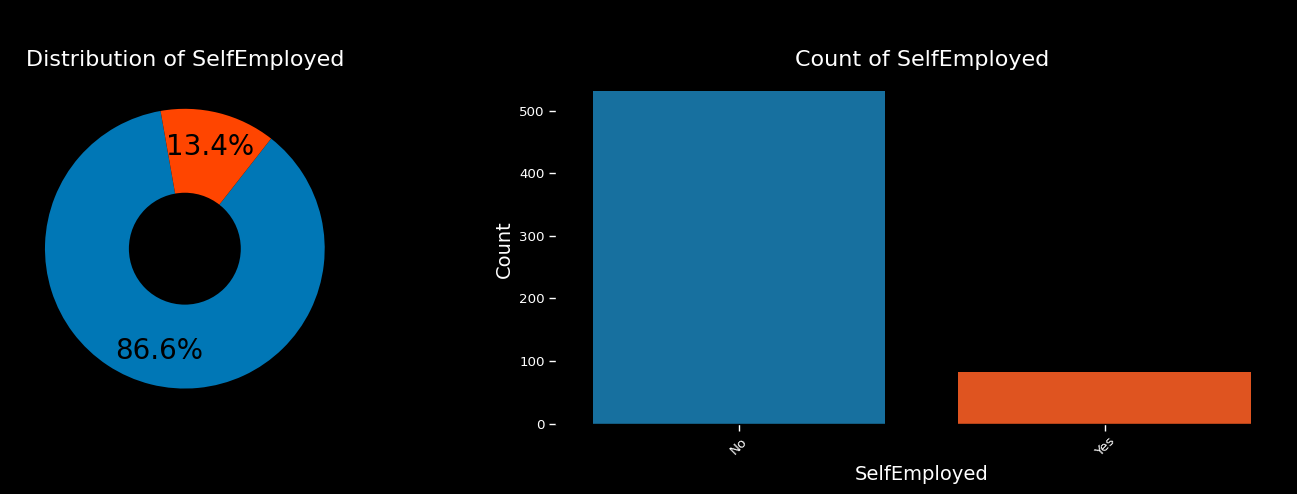

In [519]:
####################################################
display_colored_message("PLOT DISTRIBUTION OF SELFEMPLOYED...")
def single_plot_distribution(column_name, dataframe, title):

    # Get the value counts of the specified column
    value_counts = dataframe[column_name].value_counts()

    # Set up the figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), facecolor='black')

    # Set main title for the figure
    fig.suptitle(title)

    # Pie chart
    #pie_colors = ['#0077b6', '#00b4d8', '#90e0ef', '#caf0f8']
    pie_colors = ['#0077b6', '#ff4500', '#90e0ef', '#caf0f8']
    ax1.pie(value_counts, autopct='%0.001f%%', startangle=100, textprops={'fontsize': 20}, pctdistance=0.75, colors=pie_colors, labels=None)
    centre_circle = plt.Circle((0,0),0.40,fc='black')
    ax1.add_artist(centre_circle)
    ax1.set_title(f'Distribution of {column_name}', fontsize=16, color='white')

    # Bar chart
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax2, palette=pie_colors)
    ax2.set_title(f'Count of {column_name}', fontsize=16, color='white')
    ax2.set_xlabel(column_name, fontsize=14, color='white')
    ax2.set_ylabel('Count', fontsize=14, color='white')

    # Rotate x-axis labels for better readability
    ax2.tick_params(axis='x', rotation=45, colors='white')
    ax2.tick_params(axis='y', colors='white')

    # Set background color for the subplots
    ax1.set_facecolor('black')
    ax2.set_facecolor('black')

    # Show the plots
    plt.tight_layout()
    plt.show()


# Plot the distribution of SelfEmployed in the dataset
single_plot_distribution('SelfEmployed', df, 'SelfEmployed Distribution')

In [520]:

####################################################
display_colored_message("\nGROUP BY GENDER AND CALCULATE MEAN LOAN AMOUNT...")
print("\n")
# Group the DataFrame by 'Gender' and calculate the mean of 'LoanAmount'
np = round(df.groupby('Gender')['LoanAmount'].mean().round(1))

def bar_charts(x, y, title):
    # Create a bar chart using Plotly Express
    fig = px.bar(
        x=x,  # Data for the x-axis
        y=y,  # Data for the y-axis
        title=title,  # Title of the chart
        color=y,  # Color the bars based on y-values
        labels={'x': 'Gender', 'y': 'Average LoanAmount'},  # Custom axis labels
        text=y  # Add text labels to the bars
        ,width=900, height=500
    )

    # Use a dark template
    fig.update_layout(template='plotly_dark')

    fig.show()

# Call the bar_charts function to generate a bar chart
bar_charts(
    np.index,           # Data for the x-axis (gender)
    np.values,          # Data for the y-axis (average loan Amount)
    'Average Loan Amount by Gender'  # Title of the chart
)

In [521]:
####################################################
display_colored_message("\nMEAN APPLICANT INCOME BY LOAN STATUS...")

# Group by 'Loan_Status' and calculate mean 'ApplicantIncome'
income_mean = df.groupby('Loan_Status')['ApplicantIncome'].mean().reset_index()

# Create advanced bar chart using Plotly Express
fig = px.bar(income_mean, x='Loan_Status', y='ApplicantIncome',
             color='Loan_Status',
             labels={'ApplicantIncome': 'Mean Applicant Income'},
             title='Mean Applicant Income by Loan Status',
             text='ApplicantIncome',
             width=900, height=500)

# Update layout
fig.update_layout(xaxis_title='Loan Status', yaxis_title='Mean Applicant Income',
                  showlegend=False, barmode='group')

# Show the plot
fig.show()

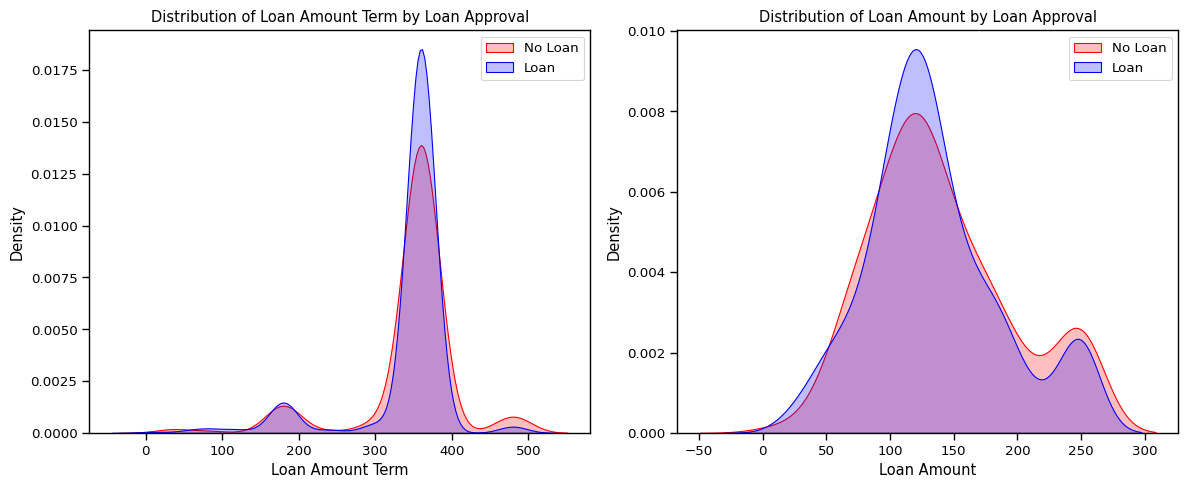

In [522]:
####################################################
display_colored_message("\nLOAN STATUS DISTRIBUTION - LOAN TERM AMOUNT...")

# Set the style and context for seaborn
sns.set_context("paper", font_scale=1.1)

# Create two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Distribution of Loan Amount Term by Loan Approval
sns.kdeplot(df.LoanAmountTerm[df["Loan_Status"] == 0], color="Red", shade=True, ax=axes[0])
sns.kdeplot(df.LoanAmountTerm[df["Loan_Status"] == 1], color="Blue", shade=True, ax=axes[0])
axes[0].legend(["No Loan", "Loan"], loc='upper right')
axes[0].set_ylabel('Density')
axes[0].set_xlabel('Loan Amount Term')
axes[0].set_title('Distribution of Loan Amount Term by Loan Approval')

# Plot 2: Distribution of Loan Amount by Loan Approval
sns.kdeplot(df.LoanAmount[df["Loan_Status"] == 0], color="Red", shade=True, ax=axes[1])
sns.kdeplot(df.LoanAmount[df["Loan_Status"] == 1], color="Blue", shade=True, ax=axes[1])
axes[1].legend(["No Loan", "Loan"], loc='upper right')
axes[1].set_ylabel('Density')
axes[1].set_xlabel('Loan Amount')
axes[1].set_title('Distribution of Loan Amount by Loan Approval')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

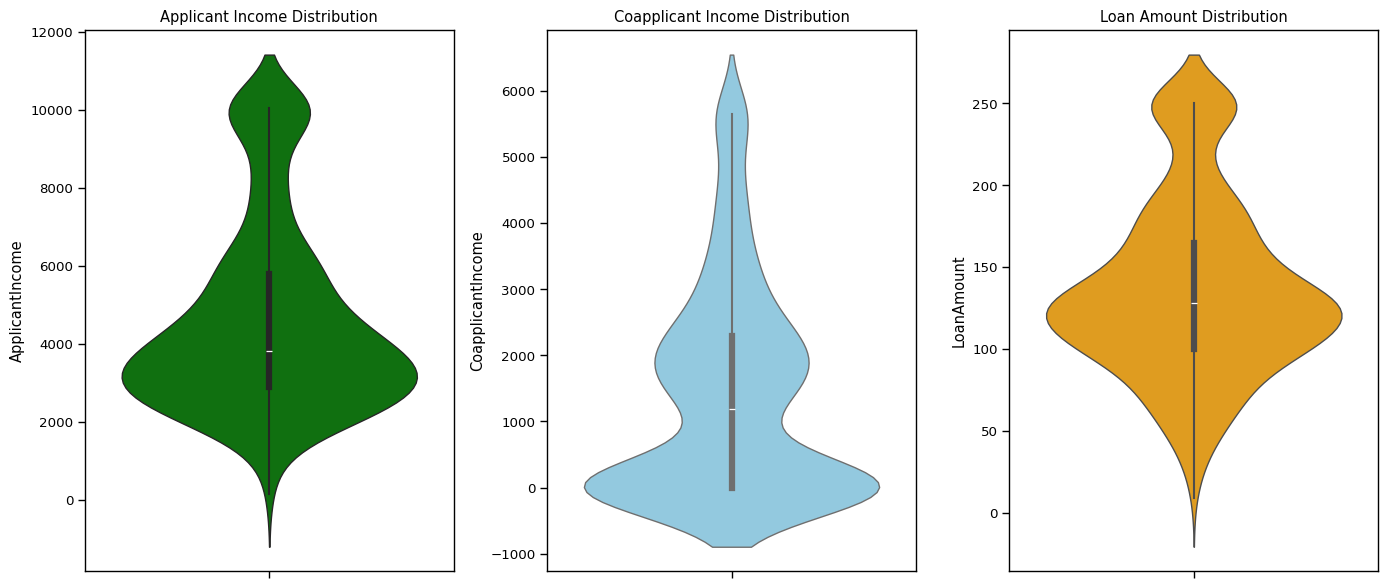

In [523]:
####################################################
display_colored_message("\nLOAN AMOUNT DISTRIBUTION...")
fig, axs1 = plt.subplots(1, 3, figsize=(14, 6))

# Create violin plots for ApplicantIncome, CoapplicantIncome, and LoanAmount
sns.violinplot(data=df, y="ApplicantIncome", ax=axs1[0], color='green')
axs1[0].set_title('Applicant Income Distribution')

sns.violinplot(data=df, y="CoapplicantIncome", ax=axs1[1], color='skyblue')
axs1[1].set_title('Coapplicant Income Distribution')

sns.violinplot(data=df, y="LoanAmount", ax=axs1[2], color='orange')
axs1[2].set_title('Loan Amount Distribution')

# Adjust layout
plt.tight_layout()
plt.show()



In [524]:
####################################################
display_colored_message("\nPIE VISULAZATION...")

#DATA visulazation
d_labels = ['Male', 'Female']
g_labels = ['Graduate', 'Not Graduate']
l_labels = ['YES', 'NO']
p_labels = ['Semiurban', 'Urban', 'Rural']

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=4, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=d_labels, values=df['Gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=g_labels, values=df['Education'].value_counts(), name="Education"),
              1, 2)
fig.add_trace(go.Pie(labels=p_labels, values=df['PropertyArea'].value_counts(), name="PropertyArea"),
              1, 3)
fig.add_trace(go.Pie(labels=l_labels, values=df['Loan_Status'].value_counts(), name="Loan_Status"),
              1, 4)


# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender Education and Loan Status Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.1, y=0.3, font_size=20, showarrow=False),
                 dict(text='Education', x=0.3, y=0.6, font_size=20, showarrow=False),
                 dict(text='PropertyArea', x=0.6, y=0.9, font_size=20, showarrow=False),
                 dict(text='Loan Status', x=0.9, y=0.5, font_size=20, showarrow=False)])
fig.show()

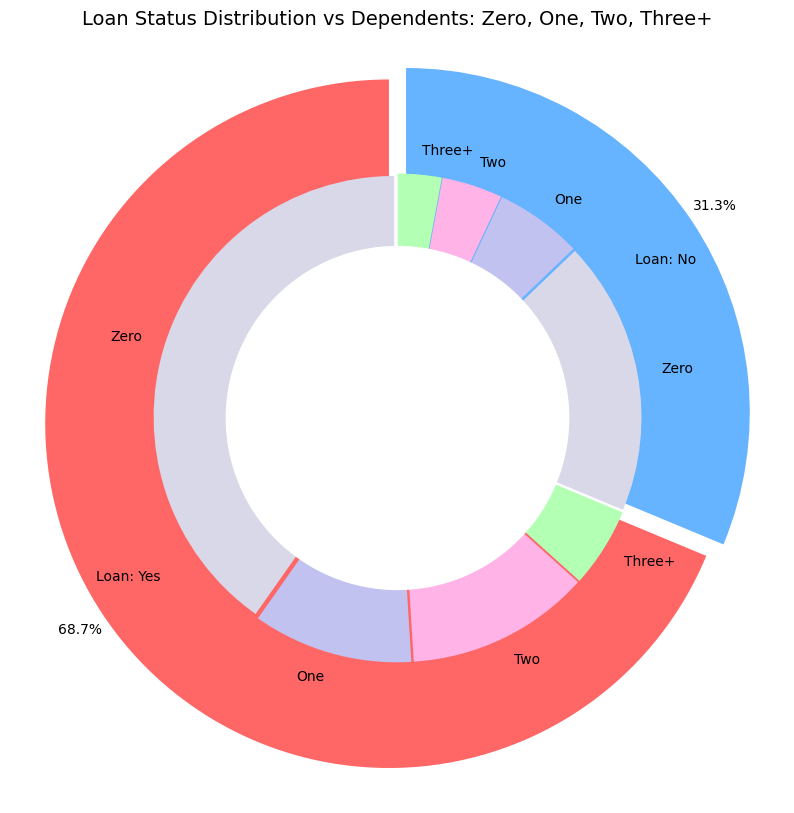

In [525]:
####################################################
display_colored_message("\nPIE LOAN STATUS DISTRIBUTION VS DEPENDENTS...")

# Find the most repeated Dependents value for each Loan_Status
mode_dependents = df.groupby('Loan_Status')['Dependents'].apply(lambda x: x.mode().iloc[0]).to_dict()

# Replace None values in Dependents column based on Loan_Status
for index, row in df.iterrows():
    if pd.isnull(row['Dependents']):
        df.at[index, 'Dependents'] = mode_dependents[row['Loan_Status']]

# Group by dependents the employees who got a loan
loan_yes_counts = df[df["Loan_Status"] == 1].groupby("Dependents").size().tolist()

# Group by dependents the employees who didn't get a loan
loan_no_counts = df[df["Loan_Status"] == 0].groupby("Dependents").size().tolist()


# Group by dependents the employees who got a loan
loan_yes_counts = df[df["Loan_Status"] == 1].groupby("Dependents").size()

# Group by dependents the employees who didn't get a loan
loan_no_counts = df[df["Loan_Status"] == 0].groupby("Dependents").size()

# Data for the outer pie chart (distribution of loan status by dependents)
labels_dependents = ["Zero", "One", "Two", "Three+", "Zero", "One", "Two", "Three+"]
sizes_dependents = [
    loan_yes_counts.get('0', 0), loan_yes_counts.get('1', 0), loan_yes_counts.get('2', 0), loan_yes_counts.get('3+', 0),
    loan_no_counts.get('0', 0), loan_no_counts.get('1', 0), loan_no_counts.get('2', 0), loan_no_counts.get('3+', 0)
]

labels_loan =["Loan: Yes", "Loan: No"]
values_loan = [sum(loan_yes_counts), sum(loan_no_counts)]

# Colors
colors_loan = ['#ff6666', '#66b3ff']
colors_dependents = ['#d8d8e9', '#c2c2f0', '#ffb3e6', '#b3ffb3', '#d8d8e9', '#c2c2f0', '#ffb3e6', '#b3ffb3']

# Explode
explode = (0.3,0.3)
explode_dependents = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

# Plot
plt.figure(figsize=(10, 10))
textprops = {"fontsize":10}

#Plot
plt.pie(values_loan, labels=labels_loan,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors_loan, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_dependents,labels=labels_dependents,colors=colors_dependents,startangle=90, explode=explode_dependents,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Set equal aspect ratio
plt.axis('equal')

plt.title('Loan Status Distribution vs Dependents: Zero, One, Two, Three+', fontsize=14, y=1)
plt.show()

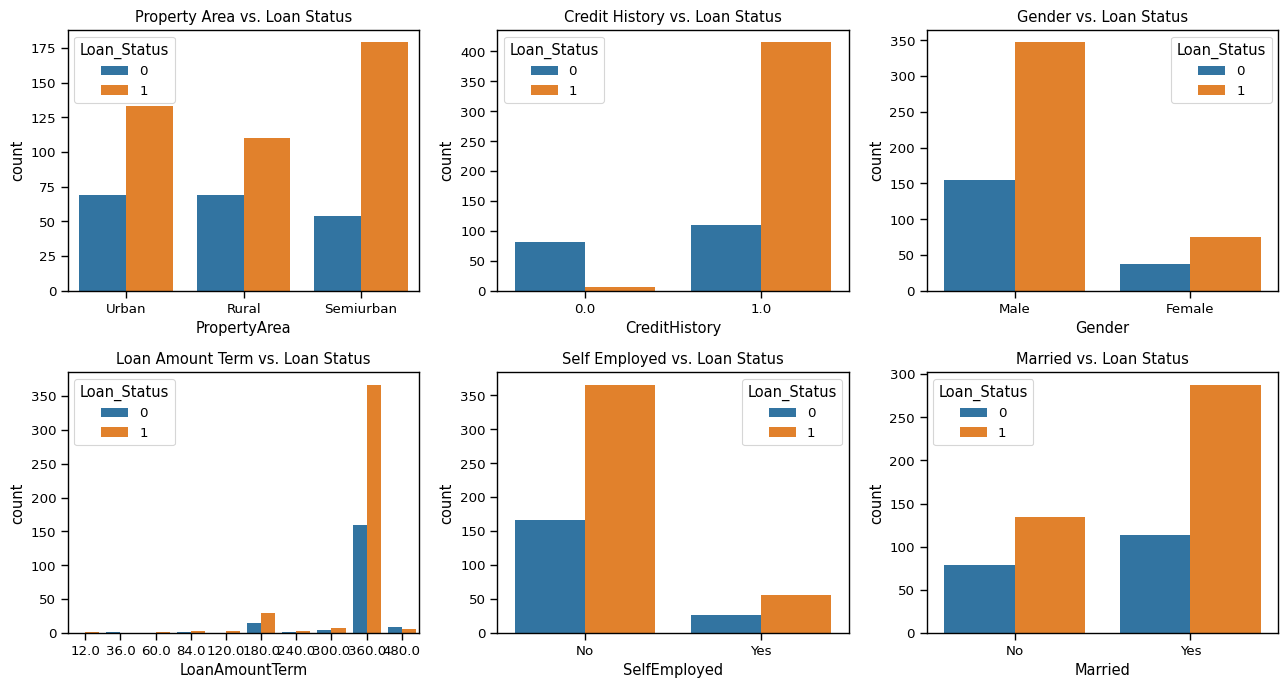

In [526]:
####################################################
display_colored_message("\n LOAN STATUS DISTRIBUTION...")

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 3, figsize=(13, 7))

# Plot 1: Property Area vs. Loan Status
sns.countplot(x='PropertyArea', hue='Loan_Status', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Property Area vs. Loan Status')

# Plot 2: Credit History vs. Loan Status
sns.countplot(x='CreditHistory', hue='Loan_Status', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Credit History vs. Loan Status')

# Plot 3: Gender vs. Loan Status
sns.countplot(x='Gender', hue='Loan_Status', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Gender vs. Loan Status')

# Plot 4: Loan Amount Term vs. Loan Status
sns.countplot(x='LoanAmountTerm', hue='Loan_Status', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Loan Amount Term vs. Loan Status')

# Plot 5: Self Employed vs. Loan Status
sns.countplot(x='SelfEmployed', hue='Loan_Status', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Self Employed vs. Loan Status')

# Plot 6: Married vs. Loan Status
sns.countplot(x='Married', hue='Loan_Status', data=df, ax=axes[1, 2])
axes[1, 2].set_title('Married vs. Loan Status')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


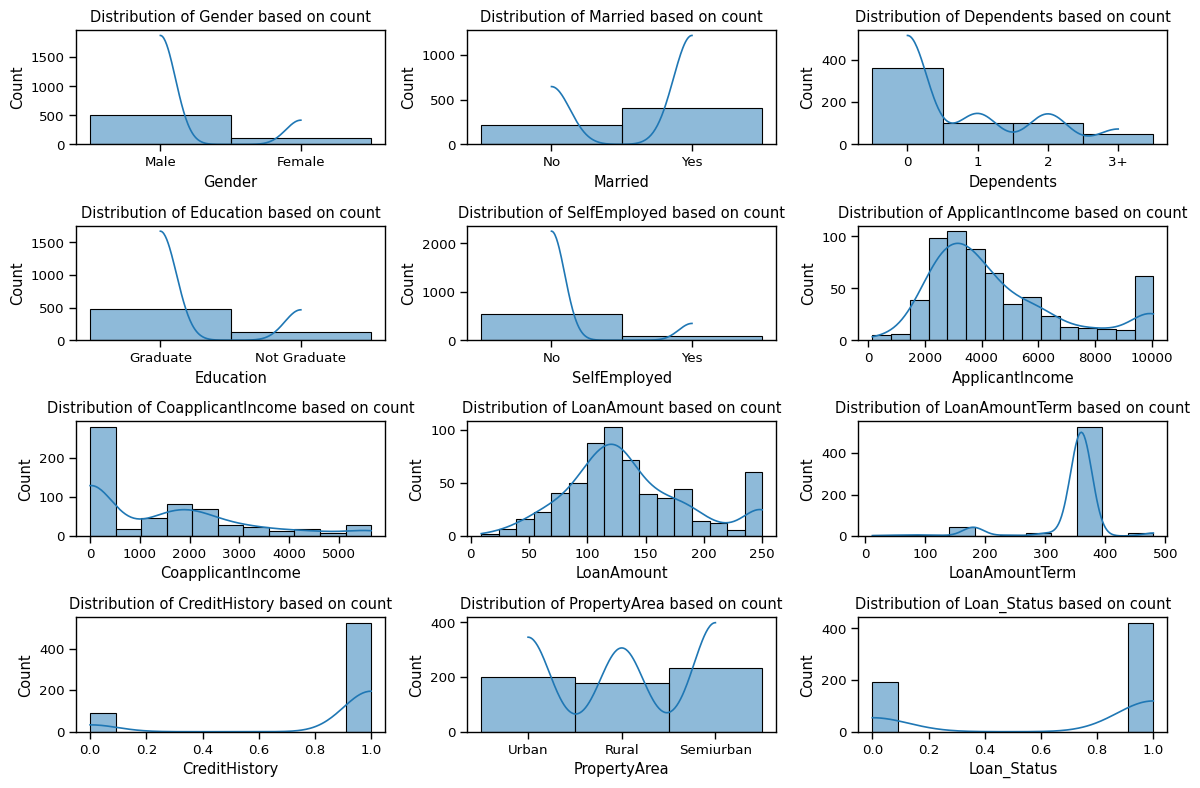

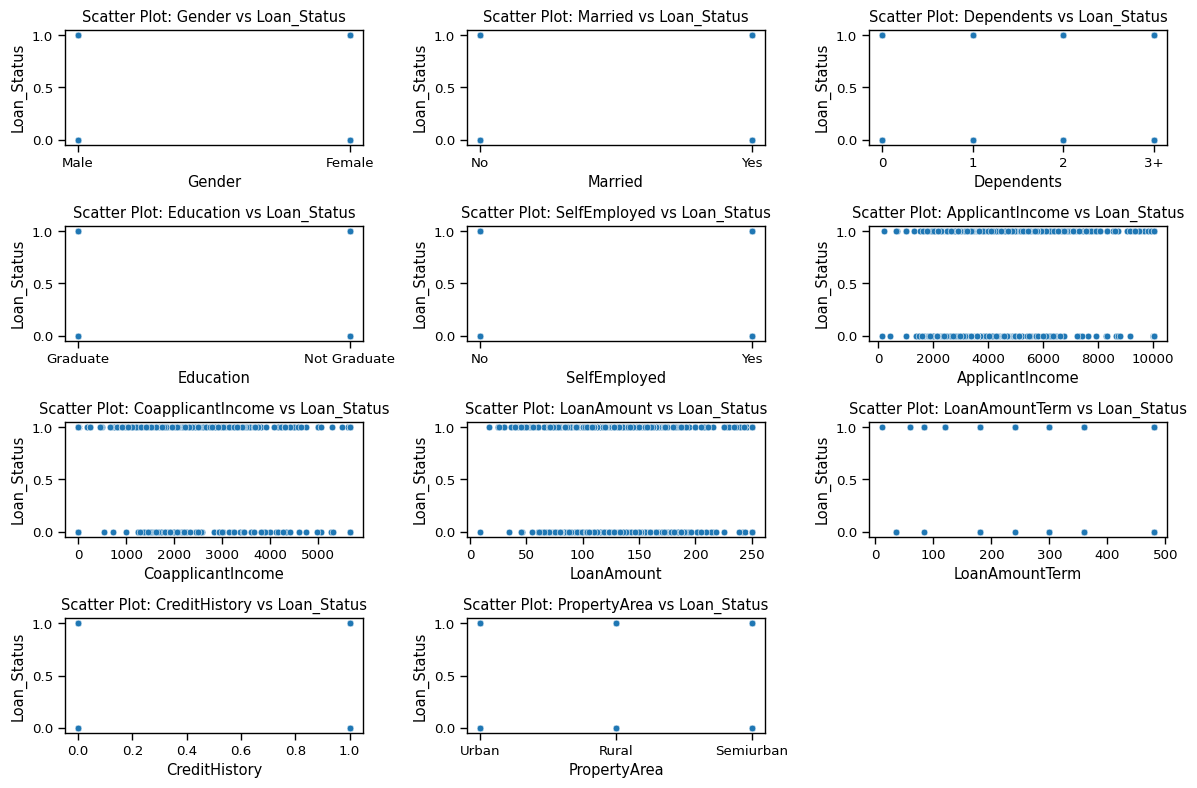

In [527]:
####################################################
display_colored_message("\n DISTRIBUTION BASED ON COUNT...")

num_cols = 3
num_rows = (len(df.columns) + num_cols - 1) // num_cols

# Create a figure and axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the axes if needed
axes = axes.flatten()

# Loop through each column and plot the distribution
for i, column in enumerate(df.columns):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column} based on count')

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the axes if needed
axes = axes.flatten()

# Iterate through each feature column (excluding the target variable)
for i, column in enumerate(df.columns[:-1]):
    # Plot scatter plot
    sns.scatterplot(x=df[column], y=df['Loan_Status'], ax=axes[i])
    axes[i].set_title(f'Scatter Plot: {column} vs Loan_Status')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Loan_Status')

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


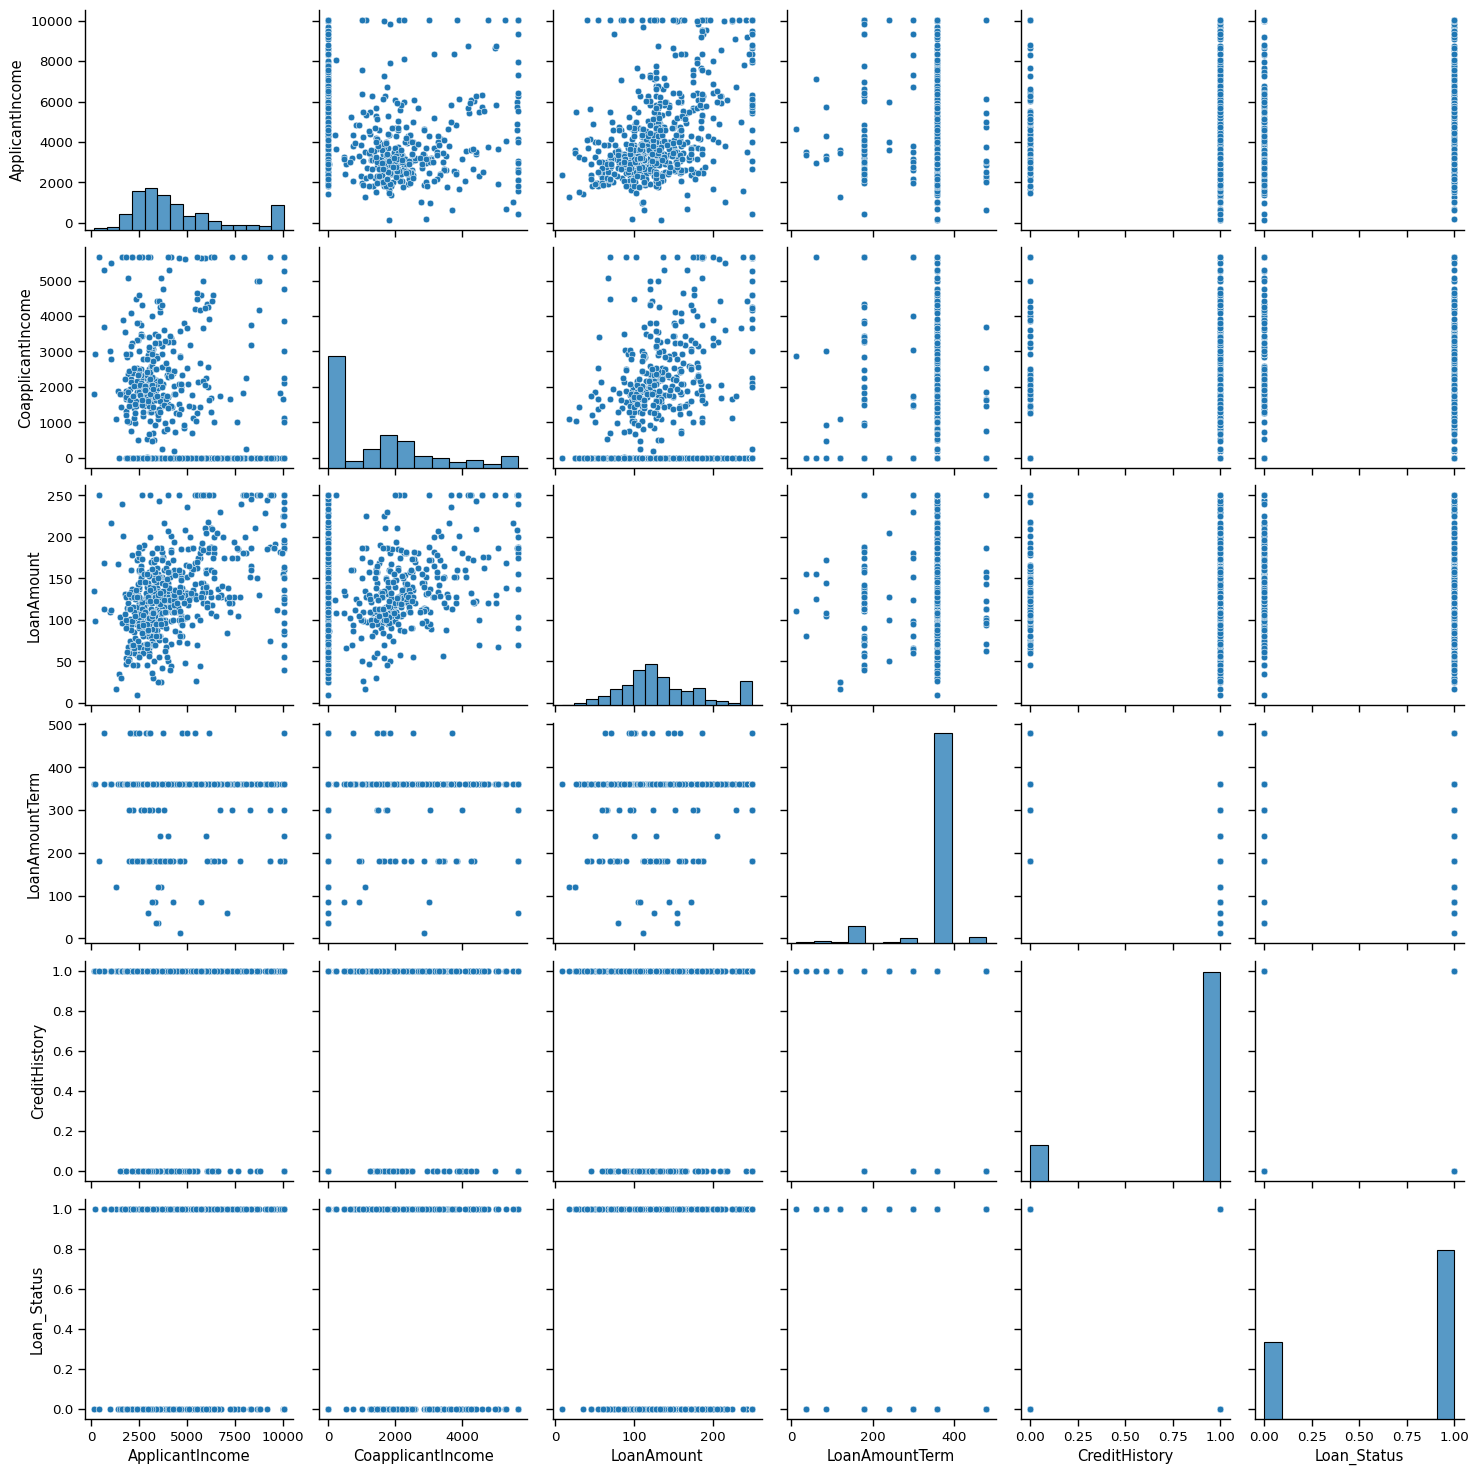

In [528]:
##############################################
display_colored_message("\nPAIR PLOT...")
# Create a pairplot
sns.pairplot(df)

# Display the pairplot
plt.show()

In [529]:
##############################################
display_colored_message("\nLABEL ENCODER...")

display_colored_message("APPLY LABEL ENCODER FOR OBJECT COLUMN TYPE...")
# Filter columns with 'object' dtype
object_columns = df.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to 'object' columns
for col in object_columns:
    df[col] = le.fit_transform(df[col])

print(colored(tabulate(df.head(1), headers='keys', tablefmt='fancy_grid'), 'cyan'))

╒════╤══════════╤═══════════╤══════════════╤═════════════╤════════════════╤═══════════════════╤═════════════════════╤══════════════╤══════════════════╤═════════════════╤════════════════╤═══════════════╕
│    │   Gender │   Married │   Dependents │   Education │   SelfEmployed │   ApplicantIncome │   CoapplicantIncome │   LoanAmount │   LoanAmountTerm │   CreditHistory │   PropertyArea │   Loan_Status │
╞════╪══════════╪═══════════╪══════════════╪═════════════╪════════════════╪═══════════════════╪═════════════════════╪══════════════╪══════════════════╪═════════════════╪════════════════╪═══════════════╡
│  0 │        1 │         0 │            0 │           0 │              0 │              5849 │                   0 │          128 │              360 │               1 │              2 │             1 │
╘════╧══════════╧═══════════╧══════════════╧═════════════╧════════════════╧═══════════════════╧═════════════════════╧══════════════╧══════════════════╧═════════════════╧════════════════╧══

In [530]:
##############################################
display_colored_message("SAVE PROCESSED CSV FILE ...")

#Save the processed data to a new CSV file
df.to_csv('/content/sample_data/loan_processed.csv', index=True)

In [531]:
##############################################
display_colored_message("MODEL DATA SPLIT..")

# Dropping multiple columns in a single call
columns_to_drop = ['SelfEmployed']
#columns_to_drop = ['SelfEmployed', 'Gender', 'Education', 'Dependents', 'Married', 'PropertyArea']

df_train = df.copy()
df_train = df_train.drop(columns=columns_to_drop)

print (df_train.shape)
X = df_train
y = df_train.Loan_Status

X = X.drop('Loan_Status',axis=1) #Remove label

#X = df[['Gender', 'Married', 'Dependents', 'Education',
 #                          'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
 #        'LoanAmountTerm', 'PropertyArea', 'CreditHistory']]

#SMOTE for imbalenced Dat
#smote=SMOTE()
#X,y=smote.fit_resample(X,y)

# Rescale and normalize the features
# Standardization (Normalization)
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Min-Max Scaling (Rescaling)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Data Splitting

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size = 0.2,
random_state = 42)


print(colored(tabulate(X.head(2), headers='keys', tablefmt='fancy_grid'), 'cyan'))

display_colored_sub_message("\nAFTER Scaler...")

# Convert X_train to a DataFrame
print(colored(tabulate(pd.DataFrame(X_scaled).head(2), headers='keys', tablefmt='fancy_grid'), 'cyan'))

(614, 11)
╒════╤══════════╤═══════════╤══════════════╤═════════════╤═══════════════════╤═════════════════════╤══════════════╤══════════════════╤═════════════════╤════════════════╕
│    │   Gender │   Married │   Dependents │   Education │   ApplicantIncome │   CoapplicantIncome │   LoanAmount │   LoanAmountTerm │   CreditHistory │   PropertyArea │
╞════╪══════════╪═══════════╪══════════════╪═════════════╪═══════════════════╪═════════════════════╪══════════════╪══════════════════╪═════════════════╪════════════════╡
│  0 │        1 │         0 │            0 │           0 │              5849 │                   0 │          128 │              360 │               1 │              2 │
├────┼──────────┼───────────┼──────────────┼─────────────┼───────────────────┼─────────────────────┼──────────────┼──────────────────┼─────────────────┼────────────────┤
│  1 │        1 │         1 │            1 │           0 │              4583 │                1508 │          128 │              360 │      


Logistic Regression Model
Train Accuracy: 0.815
Test Accuracy: 0.789

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123


Decision Tree Model
Train Accuracy: 0.998
Test Accuracy: 0.699

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.49      0.53        43
           1       0.75      0.81      0.78        80

    accuracy                           0.70       123
   macro avg       0.67      0.65      0.66       123
weighted avg       0.69      0.70      0.69       123


Random Forest Model
Train Accuracy: 0.815
Test Accuracy: 0.789

Classification Report:
              precision    recall  f1-score   support

           0       0.

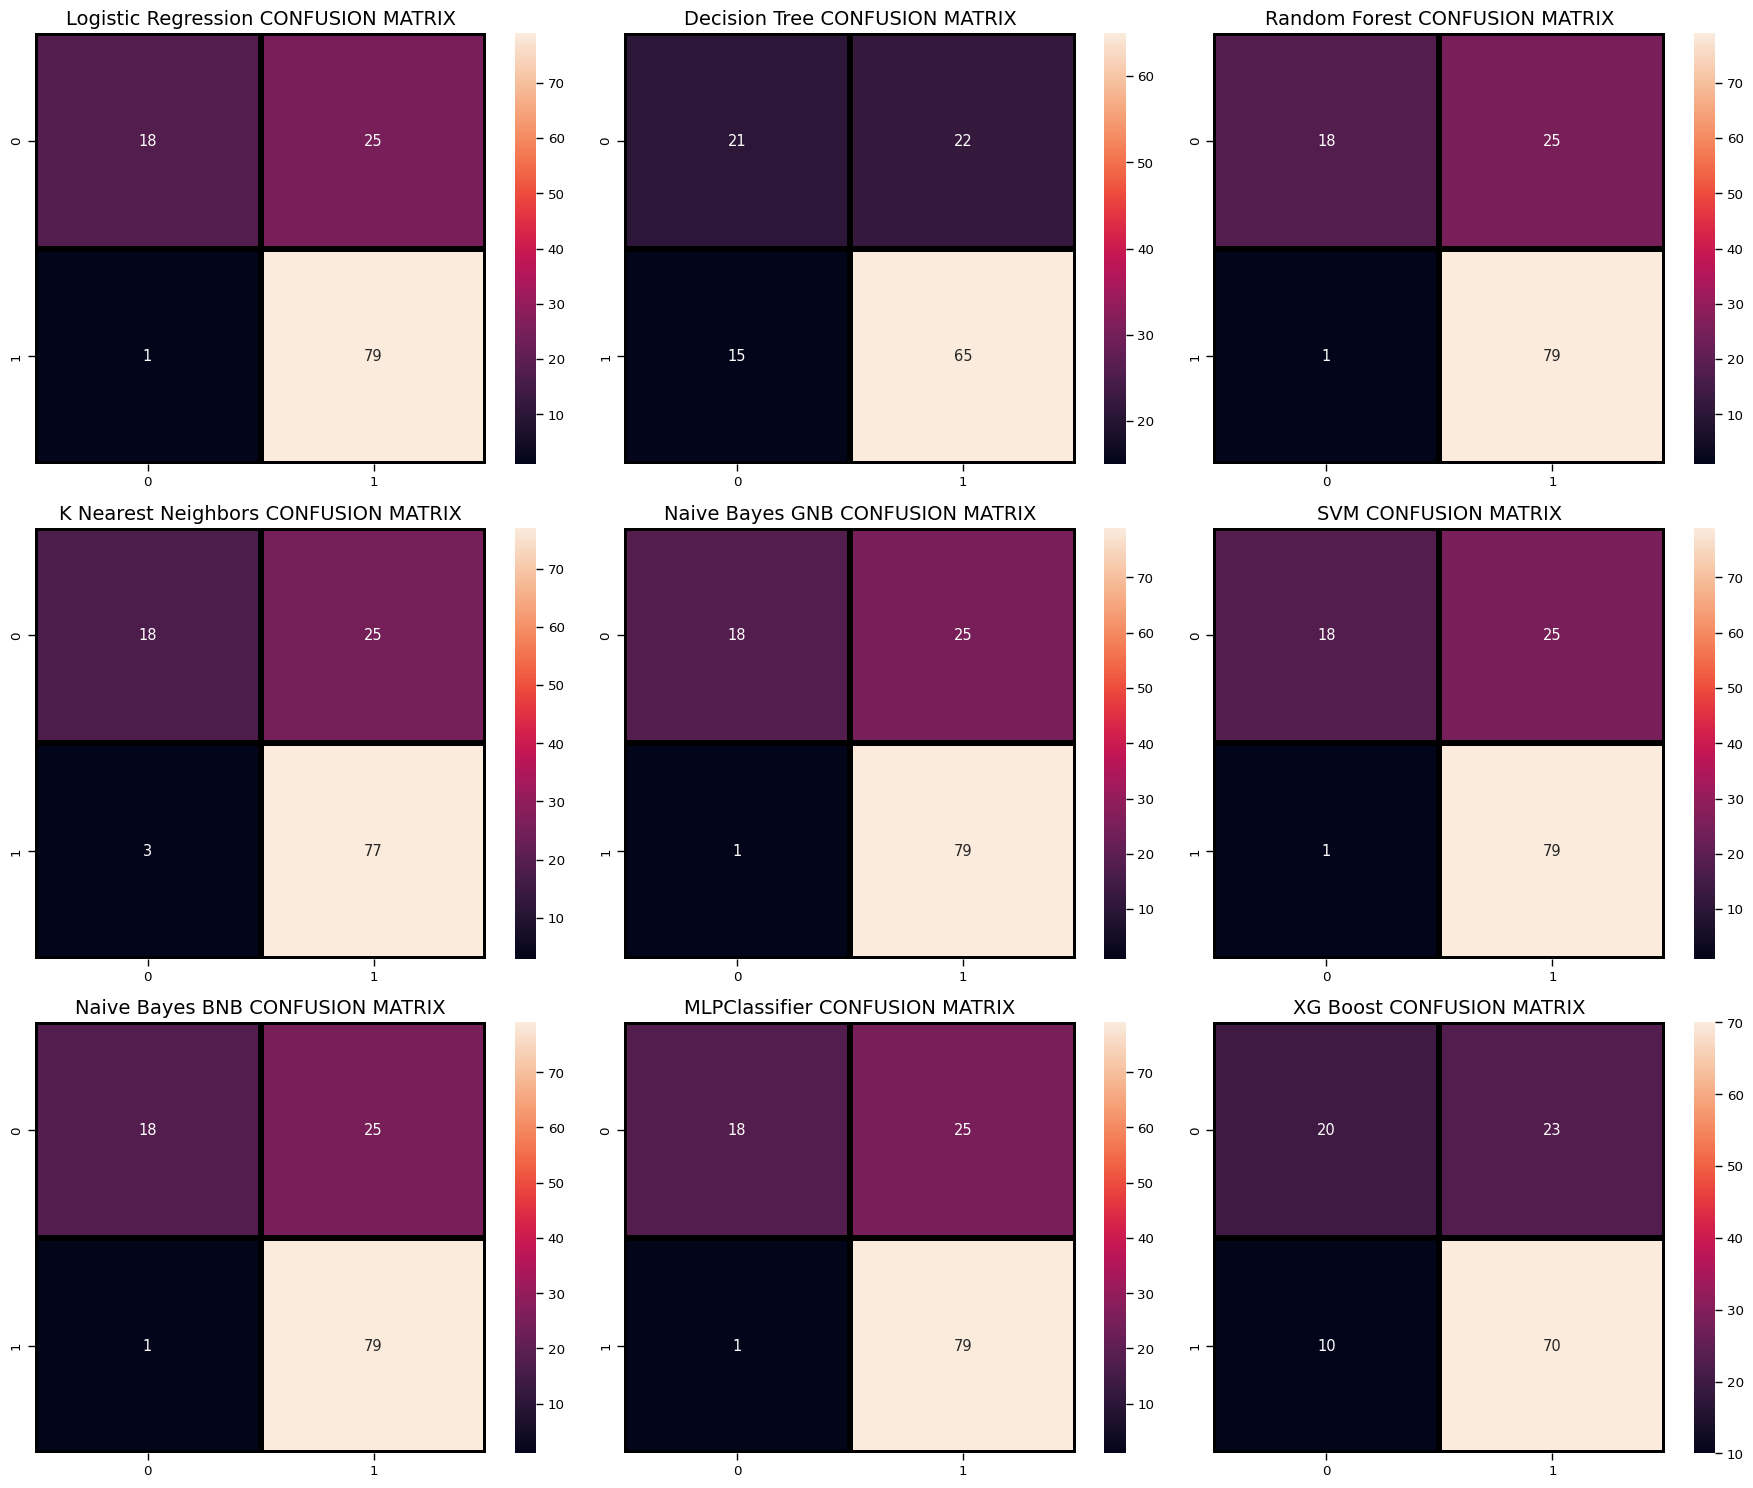

In [532]:
##############################################
display_colored_message("MODELS SCORE AND CONFUSION MATRIX...")

# Apply SMOTE for oversampling on the training data
#smote = SMOTE(random_state=42)
#X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# List of models to train
models = [
    ("Logistic Regression", LogisticRegression(max_iter=200)),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier(n_estimators=150,max_depth=17,
                          min_samples_leaf=10,min_samples_split=9)),
    ("K Nearest Neighbors", KNeighborsClassifier(n_neighbors=5)),
    ("Naive Bayes GNB", GaussianNB()),
    ("SVM", SGDClassifier(loss='log', random_state=42)),
    ("Naive Bayes BNB", BernoulliNB()),
    ("MLPClassifier", MLPClassifier()),
    ("XG Boost", XGBClassifier())
]

# Create a DataFrame to store the evaluation metrics for each model
model_metrics = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score'])

# Function to calculate evaluation metrics and add them to the DataFrame
def evaluate_model(model, model_name, X_test, y_test):
    # Predict labels
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Add metrics to the DataFrame
    model_metrics.loc[len(model_metrics)] = [model_name, accuracy, precision, recall, f1]

# Train and evaluate models
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

# Train each model and plot confusion matrix
for i, (name, model) in enumerate(models):
    model.fit(X_train, y_train)
    #model.fit(X_train_oversampled, y_train_oversampled)
    predicted_y = model.predict(X_test)

    scoreTrain = model.score(X_train, y_train)
    scoreTest = model.score(X_test, y_test)

    # Print model header with color
    print(colored(f"\n{'='*40}\n{name} Model\n{'='*40}", 'blue'))
    print(colored(f"Train Accuracy: {scoreTrain:.3f}", 'green'))
    print(colored(f"Test Accuracy: {scoreTest:.3f}\n", 'green'))


    # Print classification report with color
    print(colored("Classification Report:", 'blue'))
    report = classification_report(y_test, predicted_y)
    print(colored(report, 'yellow'))

    sns.heatmap(confusion_matrix(y_test, predicted_y), annot=True, fmt="d", linecolor="k", linewidths=3, ax=axes[i])
    axes[i].set_title(f"{name} CONFUSION MATRIX", fontsize=14)

    evaluate_model(model, name, X_test, y_test)


    # Compute learning curve
    #train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5)

    # Compute average train and test scores
    #avg_train_scores = np.mean(train_scores, axis=1)
    #avg_test_scores = np.mean(test_scores, axis=1)

    # Convert to lists to make them hashable
   # avg_train_scores = avg_train_scores.tolist()
    #avg_test_scores = avg_test_scores.tolist()

   # plt.figure(figsize=(10, 6))
    ##plt.plot(train_sizes, avg_train_scores, label='Training Score')
    #plt.plot(train_sizes, avg_test_scores, label='Validation Score')
    #plt.xlabel('Training Set Size')
   # plt.ylabel('Accuracy')
    #plt.title(f'Learning Curve for {name}')
    #plt.legend()
   # plt.grid(True)
   # plt.show()

plt.tight_layout()
plt.show()

display_colored_message("MODELS COMPARISON...")


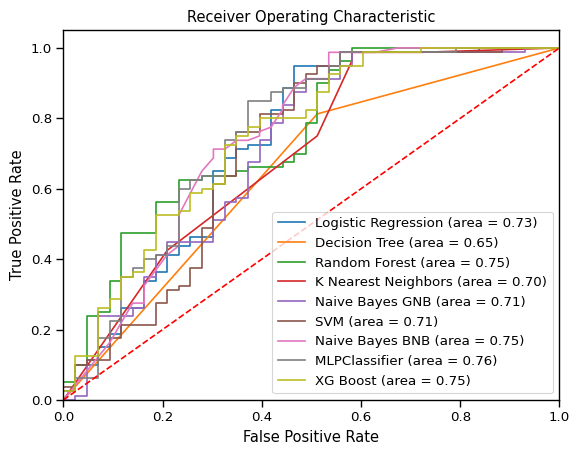

In [533]:
##############################################
display_colored_message("ROC CURVE AND AUC SCORE...")

# ROC Curve and AUC Score

# Define dictionaries to store ROC AUC scores and curves
roc_auc_scores = {}
fpr_tpr = {}

# Calculate ROC AUC scores and curves for each model
for name, model in models:
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, p = roc_curve(y_test, y_pred_proba)
    roc_auc_scores[name] = roc_auc
    fpr_tpr[name] = (fpr, tpr)

# Plot ROC curves
plt.figure()
for name in roc_auc_scores:
    fpr, tpr = fpr_tpr[name]
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc_scores[name]:.2f})')

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [534]:
##############################################
display_colored_message("MODEL METRICS...")
# Apply styles to highlight the highest metric for each model
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Apply the style to the DataFrame
styled_model_metrics = model_metrics.style.apply(highlight_max, subset=['Accuracy', 'Precision', 'Recall', 'F1-score'])

# Save the styled DataFrame to an HTML file
styled_model_metrics_file = "model_metrics.html"
styled_model_metrics_html = styled_model_metrics.to_html()
with open(styled_model_metrics_file, "w") as f:
    f.write(styled_model_metrics_html)

print("Styled model metrics saved to:", styled_model_metrics_file)
# Display the HTML output
display(HTML(styled_model_metrics_html))


Styled model metrics saved to: model_metrics.html


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.788618,0.759615,0.987500,0.858696
1,Decision Tree,0.699187,0.747126,0.812500,0.778443
2,Random Forest,0.788618,0.759615,0.987500,0.858696
3,K Nearest Neighbors,0.772358,0.754902,0.962500,0.846154
4,Naive Bayes GNB,0.788618,0.759615,0.987500,0.858696
5,SVM,0.788618,0.759615,0.987500,0.858696
6,Naive Bayes BNB,0.788618,0.759615,0.987500,0.858696
7,MLPClassifier,0.788618,0.759615,0.987500,0.858696
8,XG Boost,0.731707,0.752688,0.875000,0.809249


In [535]:
##############################################
display_colored_message("EVALUATION METRICS...")

# Define the models and their corresponding evaluation metrics
models_list = [name for name, model in models]
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Initialize lists to store the metrics for each model
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Populate the lists with the metrics for each model
for model_name in models_list:
    model_metrics_row = model_metrics[model_metrics['Model'] == model_name].iloc[0]
    accuracies.append(model_metrics_row['Accuracy'])
    precisions.append(model_metrics_row['Precision'])
    recalls.append(model_metrics_row['Recall'])
    f1_scores.append(model_metrics_row['F1-score'])

# Create a DataFrame from the metrics lists
metrics_df = pd.DataFrame({
    'Model': models_list,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1-score': f1_scores
})

# 3D scatter plot comparison between models
fig = px.scatter_3d(
    metrics_df,
    x='Accuracy',
    y='Precision',
    z='Recall',
    color='F1-score',  # Use F1-score for color to represent overall performance
    size='F1-score',   # Use F1-score for size to emphasize models with higher F1-scores
    size_max=18,
    symbol='Model',    # Use Model for symbols to differentiate between different models
    opacity=0.7
)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

# Display the plot
fig.show()


# 3D scatter plot comparison between models
fig = px.scatter_3d(
    metrics_df,
    x='Accuracy',
    y='F1-score',
    z='Precision',  # Use Precision for z-axis
    color='Model',  # Use Model for color to differentiate between different models
    size='F1-score',   # Use F1-score for size to emphasize models with higher F1-scores
    size_max=18,
    symbol='Model',    # Use Model for symbols to differentiate between different models
    opacity=0.7
)

# Update layout for better visualization
fig.update_layout(
    title='Model Performance Comparison',
    scene=dict(
        xaxis_title='Accuracy',
        yaxis_title='F1-score',
        zaxis_title='Precision'
    )
)

# Display the figure
fig.show()


In [536]:
##############################################
display_colored_message("MODEL PERFORMANCE BY METRICS...")

# Bar plot comparison between metrics for each model
fig = go.Figure()
for model_name in models_list:
    model_index = models_list.index(model_name)
    metrics_values = [accuracies[model_index], precisions[model_index], recalls[model_index], f1_scores[model_index]]
    fig.add_trace(go.Bar(
        x=metrics,
        y=metrics_values,
        name=model_name,
        marker=dict(color=px.colors.qualitative.Plotly[model_index]),
        width=0.08
    ))

fig.update_layout(
    barmode='group',
    title='Model Performance Comparison by Metric',
    xaxis_title='Metrics',
    yaxis_title='Score',
    legend_title='Model',
    width=1400,  # Adjust the width of the plot
    height=500  # Optionally adjust the height of the plot
)
fig.show()

In [537]:
##############################################
display_colored_message("MODEL RADAR CHART COMPARAISON...")

# Radar chart comparison between metrics for each model
fig = go.Figure()
for model_name in models_list:
    model_index = models_list.index(model_name)
    fig.add_trace(go.Scatterpolar(
        r=[accuracies[model_index], precisions[model_index], recalls[model_index], f1_scores[model_index]],
        theta=metrics,
        fill='toself',
        name=model_name,
        marker=dict(color=px.colors.qualitative.Plotly[model_index]),
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )),
    showlegend=True,
    title='Model Performance Comparison by Metric',
    width=1200,
    height=800,
)
fig.show()


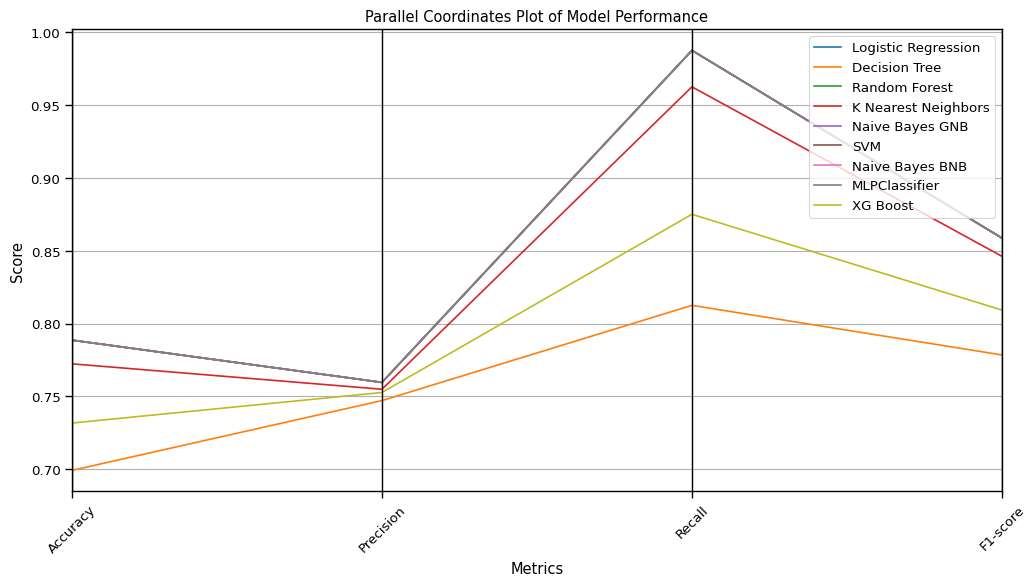

In [538]:
##############################################
display_colored_message("MODEL PERFORMANCE PARALLEL COORDINATES...")

# Parallel coordinates plot for model performance
scores = {'Model': models_list}
for metric in metrics:
    scores[metric] = [model_metrics[model_metrics['Model'] == model_name].iloc[0][metric] for model_name in models_list]

parallel_data = pd.DataFrame(scores)
colors = plt.cm.tab10(range(len(models_list)))


plt.figure(figsize=(12, 6))
parallel_coordinates(parallel_data, 'Model', colormap='viridis', color=colors)
plt.legend(loc='upper right')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.title('Parallel Coordinates Plot of Model Performance')
plt.show()


Index(['Gender', 'Married', 'Dependents', 'Education', 'SelfEmployed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'LoanAmountTerm',
       'CreditHistory', 'PropertyArea', 'Loan_Status'],
      dtype='object')
ORIGINAL TESTING DATASET...
╒════╤═══════════╤══════════╤═══════════╤══════════════╤═════════════╤════════════════╤═══════════════════╤═════════════════════╤══════════════╤══════════════════╤═════════════════╤════════════════╕
│    │ Loan_ID   │ Gender   │ Married   │   Dependents │ Education   │ SelfEmployed   │   ApplicantIncome │   CoapplicantIncome │   LoanAmount │   LoanAmountTerm │   CreditHistory │ PropertyArea   │
╞════╪═══════════╪══════════╪═══════════╪══════════════╪═════════════╪════════════════╪═══════════════════╪═════════════════════╪══════════════╪══════════════════╪═════════════════╪════════════════╡
│  0 │ LP001015  │ Male     │ Yes       │            0 │ Graduate    │ No             │              5720 │                   0 │          110 │   

╒════╤═══════════╤══════════╤═══════════╤══════════════╤═════════════╤═════════════════╤═══════════════════╤═════════════════════╤══════════════╤════════════════════╤══════════════════╤═════════════════╤═══════════════╕
│    │ Loan_ID   │ Gender   │ Married   │   Dependents │ Education   │ Self_Employed   │   ApplicantIncome │   CoapplicantIncome │   LoanAmount │   Loan_Amount_Term │   Credit_History │ Property_Area   │   Loan_Status │
╞════╪═══════════╪══════════╪═══════════╪══════════════╪═════════════╪═════════════════╪═══════════════════╪═════════════════════╪══════════════╪════════════════════╪══════════════════╪═════════════════╪═══════════════╡
│  0 │ LP001015  │ Male     │ Yes       │            0 │ Graduate    │ No              │              5720 │                   0 │          110 │                360 │                1 │ Urban           │             1 │
├────┼───────────┼──────────┼───────────┼──────────────┼─────────────┼─────────────────┼───────────────────┼────────────

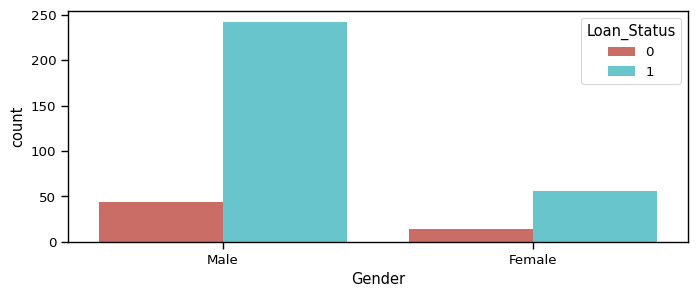

In [539]:
##############################################
display_colored_message("MODEL TEST...")

# Given DataFrame
testingData = pd.DataFrame({
    'Loan_ID': ['LP001015', 'LP001022', 'LP001031'],
    'Gender': ['Male', 'Male', 'Male'],
    'Married': ['Yes', 'Yes', 'Yes'],
    'Dependents': ['0', '1', '2'],
    'Education': ['Graduate', 'Graduate', 'Graduate'],
    'SelfEmployed': ['No', 'No', 'No'],
    'ApplicantIncome': [5720, 3076, 5000],
    'CoapplicantIncome': [0, 1500, 1800],
    'LoanAmount': [110, 126, 208],
    'LoanAmountTerm': [360, 360, 360],
    'CreditHistory': [1, 1, 1],
    'PropertyArea': ['Urban', 'Urban', 'Urban'],
})


path = '/content/sample_data/'
testingData = pd.read_csv(path + 'loan_test.csv')

testDf = testingData.copy()

display_colored_message("RENAME COLUMNS...")
#Rename columuns Self_Employed, Credit_History, Loan_Amount_Term
testDf = testDf.rename(columns={'Self_Employed' : 'SelfEmployed'})
testDf = testDf.rename(columns={'Credit_History' : 'CreditHistory'})
testDf = testDf.rename(columns={'Loan_Amount_Term' : 'LoanAmountTerm'})
testDf = testDf.rename(columns={'Property_Area' : 'PropertyArea'})
print(df.columns)

display_colored_sub_message("ORIGINAL TESTING DATASET...")

print(colored(tabulate(testDf.head(2), headers='keys', tablefmt='fancy_grid'), 'cyan'))
testDf = testDf.drop(columns=['Loan_ID'])
testDf = testDf.drop(columns=['SelfEmployed'])
#testDf = testDf.drop(columns=['Gender'])

#Missing Value
# Gender column
#testDf['Gender'] = testDf['Gender'].fillna(testDf['Gender'].mode()[0])
# Married column
testDf['Married'] = testDf['Married'].fillna(testDf['Married'].mode()[0])
# Dependents Column
testDf['Dependents'] = testDf['Dependents'].fillna(testDf['Dependents'].mode()[0])
# Self_Employed Column
#df['SelfEmployed'].fillna('No',inplace=True)
# Credit_History Column
testDf['CreditHistory'] = testDf['CreditHistory'].fillna(testDf['CreditHistory'].mode()[0])
# LoanAmount Column
testDf['LoanAmount'] = testDf['LoanAmount'].fillna(testDf['LoanAmount'].median())
# Loan_Amount Column
testDf['LoanAmountTerm'] = testDf['LoanAmountTerm'].fillna(testDf['LoanAmountTerm'].mode()[0])
# PropertyArea Column
testDf['PropertyArea'] = testDf['PropertyArea'].fillna(testDf['PropertyArea'].mode()[0])


display_colored_sub_message("TESTING DATASET NO MISSING  & DROP COLUMNS...")
print(colored(tabulate(testDf.head(2), headers='keys', tablefmt='fancy_grid'), 'cyan'))

le = LabelEncoder()

# Apply LabelEncoder to 'object' columns
object_columns = testDf.select_dtypes(include=['object']).columns
for col in object_columns:
    testDf[col] = le.fit_transform(testDf[col])

#df_train = df_train.drop(columns=['Loan_Status'])

display_colored_sub_message("TESTING DATASET LAPPLY LABEL ENCODER...")
print(colored(tabulate(testDf.head(2), headers='keys', tablefmt='fancy_grid'), 'cyan'))

# Fit and transform the data
scaled_team_data = scaler.transform(testDf)

display_colored_sub_message("TESTING DATASET APPLY SCALER...")
# Convert X_train to a DataFrame
print(colored(tabulate(pd.DataFrame(scaled_team_data).head(2), headers='keys', tablefmt='fancy_grid'), 'cyan'))

# Assuming you have trained your models list previously

#"Logistic Regression" "Decision Tree" "Random Forest" "K Nearest Neighbors" "Naive Bayes GNB"
#"SVM" "Naive Bayes BNB" "MLPClassifier" "XG Boost"

MODEL_SELECTED = "Naive Bayes BNB"

display_colored_sub_message(f"TESTING DATASET APPLY MODEL : {MODEL_SELECTED}...")

# Find Best model in the models list
best_model = None
for name, model in models:
    if name == MODEL_SELECTED:
        best_model = model
        break

# Check if best_model model is found
if best_model is not None:
    # Assuming you have your data for prediction stored in X_pred
    # Make predictions using best_model model
    predictions = best_model.predict(scaled_team_data)
    # Now you have predictions using best_model model
    #print(f"{MODEL_SELECTED} prediction:", predictions)

    testingData['Loan_Status'] = predictions
else:
    print(f"{MODEL_SELECTED} model not found in the models list.")

display_colored_message(f"TESTING DATASET WITH PREDICTION...")
print(colored(tabulate(testingData.head(2), headers='keys', tablefmt='fancy_grid'), 'cyan'))

testOutputFileName = path + 'loan_test_output.csv'
display_colored_sub_message(f"GENERATE THE NEW DATASET WITH PREDICTION {testOutputFileName}")
# Assuming df is your DataFrame
testingData.to_csv(testOutputFileName, index=False)

display_colored_message("DATA VISULAZATION...")

# Counting the accurance of each value in Gender column
testingData['Gender'].value_counts()

# comparing loan status with gender column
plt.figure(figsize=(8,3))
sns.countplot(x = 'Gender',hue ='Loan_Status', data=testingData , palette='hls')
plt.show()

Feature importance for Logistic Regression:


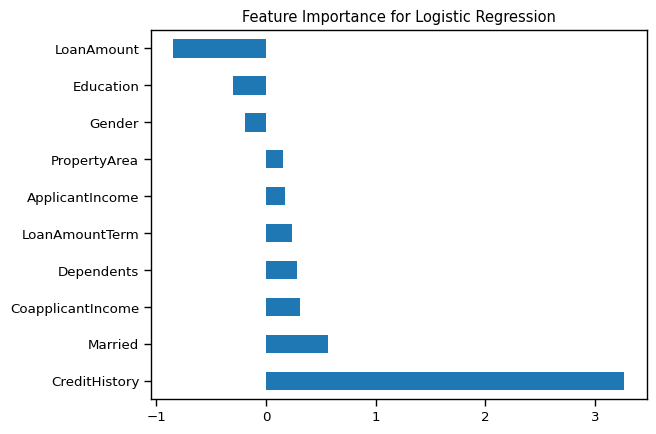

LoanAmount: -84.37%
Education: -30.21%
Gender: -19.14%
PropertyArea: 15.75%
ApplicantIncome: 17.29%
LoanAmountTerm: 23.61%
Dependents: 28.61%
CoapplicantIncome: 31.51%
Married: 56.84%
CreditHistory: 326.68%

Feature importance for Decision Tree:


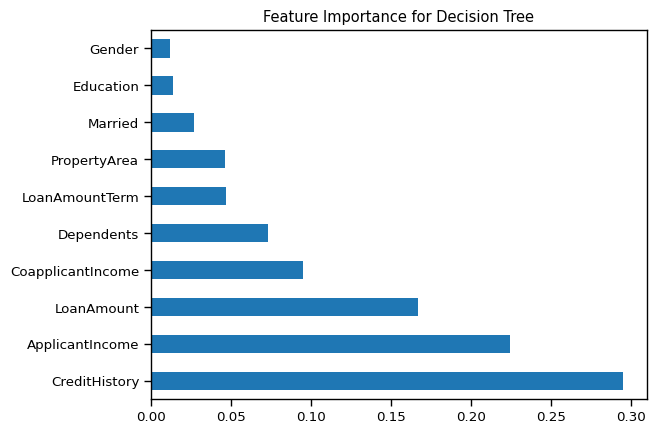

Gender: 1.20%
Education: 1.39%
Married: 2.68%
PropertyArea: 4.61%
LoanAmountTerm: 4.67%
Dependents: 7.34%
CoapplicantIncome: 9.51%
LoanAmount: 16.70%
ApplicantIncome: 22.41%
CreditHistory: 29.49%

Feature importance for Random Forest:


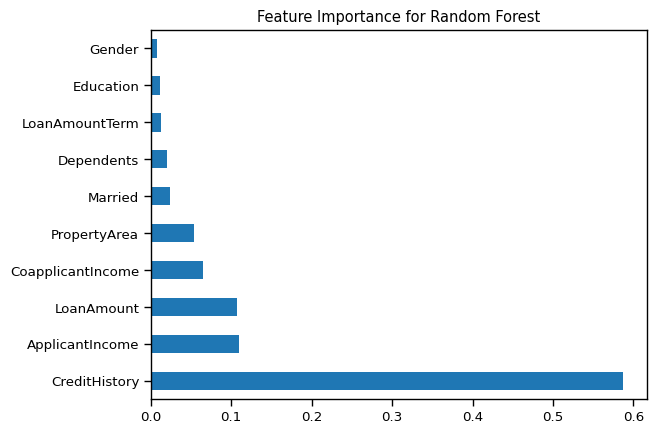

Gender: 0.82%
Education: 1.20%
LoanAmountTerm: 1.31%
Dependents: 2.03%
Married: 2.35%
PropertyArea: 5.40%
CoapplicantIncome: 6.47%
LoanAmount: 10.73%
ApplicantIncome: 10.97%
CreditHistory: 58.72%

Feature importance for K Nearest Neighbors:


ValueError: Length of values (0) does not match length of index (10)

In [540]:
####################################################
display_colored_message("MODEL IMPORTANCE FEATURES...")

#Model importance feature

#feature_labels = np.array(['Gender', 'Married', 'Dependents', 'Education', 'SelfEmployed',
#                           'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
#         'LoanAmountTerm', 'PropertyArea', 'CreditHistory'])

# Get feature labels from DataFrame columns (excluding the last column)
feature_labels = df_train.columns[:-1].values

# Function to display feature importance
def display_feature_importance(model, model_name, feature_labels):
    if hasattr(model, "feature_importances_"):
        importance = model.feature_importances_
    elif hasattr(model, "coef_"):
        importance = model.coef_[0]
    else:
        importance = []
    print(f"\033[1m\033[34m{'='*40}\nFeature importance for {model_name}:\n{'='*40}\033[0m")
    # Creating a series for feature importances
    feat_importances = pd.Series(importance, index=feature_labels)
    feat_importances.nlargest(12).plot(kind='barh')
    plt.title(f"Feature Importance for {model_name}")
    plt.show()

    feature_indexes_by_importance = importance.argsort()

    for index in feature_indexes_by_importance:
        importance_percentage = importance[index] * 100.0
        feature_name = feature_labels[index]
        color_code = '\033[32m' if importance_percentage > 10 else '\033[33m' if importance_percentage > 5 else '\033[0m'
        print(f"{color_code}{feature_name}: {importance_percentage:.2f}%\033[0m")
    print()


# Display feature importance for applicable models
for i in range(len(models)):
    name, model_instance = models[i]
    display_feature_importance(model_instance, name, feature_labels)

In [ ]:
####################################################
display_colored_message("DEEP LEARNING...")

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


# Enhanced deep learning model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test).flatten()
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Deep Learning Model Accuracy: {accuracy * 100:.2f}%')
print(f'Deep Learning Model AUC-ROC: {roc_auc:.2f}')

